#### 1. The first 17 steps are from the GDP_workers.ipynb file. 
#### 2. The below cells are processed using the output generated from the step. 
#### 3. This processing follows the GDP per capita values for every NUTS 3 region. 

In [1]:
import pandas as pd

# Step 1: Read the combined pollutant and GDP data (with geometry) file
df_combined = pd.read_csv("combined_pollutant_gdp_data_with_geometry.csv")

# Step 2: Read the population density data (ensure it's properly formatted)
df_population = pd.read_csv("population.csv")

# Step 3: Reshape the population data to have 'NUTS_ID', 'year', and 'population' columns
df_population = df_population.melt(id_vars=["NUTS_ID"], 
                                   value_vars=["2018", "2019", "2020", "2021", "2022", "2023"],
                                   var_name="year", value_name="population")

# Ensure 'year' column is integer type for proper merging
df_population['year'] = df_population['year'].astype(int)

# Step 4: Merge population data with the combined pollutant and GDP data
df_combined = df_combined.merge(df_population, on=['NUTS_ID', 'year'], how='left')

# Step 5: Calculate GDP per capita
df_combined['GDP'] = df_combined['GDP'] *1000000

df_combined['GDP_per_capita'] = df_combined['GDP'] / df_combined['population']

# Step 6: Check for any NaN values in GDP_per_capita column (optional)
print("Missing values in GDP_per_capita:", df_combined['GDP_per_capita'].isna().sum())

# Step 7: Save the updated DataFrame with GDP_per_capita
df_combined.to_csv("combined_pollutant_gdp_data_with_gdp_per_capita1.csv", index=False)

print("GDP per capita column added and saved as 'combined_pollutant_gdp_data_with_gdp_per_capita.csv'")


Missing values in GDP_per_capita: 0
GDP per capita column added and saved as 'combined_pollutant_gdp_data_with_gdp_per_capita.csv'


In [69]:
df_combined

NUTS_ID  year  month       NO2    SO2        CO        O3  HCHO  \
0      NL112  2018      1  0.480218  63.22  0.032802  0.182354  0.25   
1      NL112  2018      2  2.049908  49.09  0.035762  0.136167  4.22   
2      NL112  2018      3  0.966513   1.17  0.037744  0.158723  0.20   
3      NL112  2018      4  1.711622   0.65  0.037768  0.168643  1.27   
4      NL112  2018      5  2.753763  16.57  0.030604  0.151060  3.86   
...      ...   ...    ...       ...    ...       ...       ...   ...   
3739   SI044  2023      8  0.707374  10.85  0.051438  0.142255  4.28   
3740   SI044  2023      9  1.184261  67.30  0.030808  0.124775  4.82   
3741   SI044  2023     10  1.361142   1.33  0.028556  0.149627  1.79   
3742   SI044  2023     11  2.238057  11.42  0.030413  0.134300  2.05   
3743   SI044  2023     12  1.488782  72.36  0.030810  0.133060  2.26   

          PM25           GDP  \
0      9.13472  2.464020e+09   
1      7.29672  2.464020e+09   
2     10.68873  2.464020e+09   
3     11.92120  2.464020e+09   
4     10.06222  2.464020e+09   
...        ...           ...   
3739   9.42605  3.377430e+09   
3740   9.86098  3.377430e+09   
3741  10.43460  3.377430e+09   
3742   6.66507  3.377430e+09   
3743  10.49228  3.377430e+09   

                                               geometry  population  \
0     MULTIPOLYGON (((6.874905014244085 53.408013093...       46000   
1     MULTIPOLYGON (((6.874905014244085 53.408013093...       46000   
2     MULTIPOLYGON (((6.874905014244085 53.408013093...       46000   
3     MULTIPOLYGON (((6.874905014244085 53.408013093...       46000   
4     MULTIPOLYGON (((6.874905014244085 53.408013093...       46000   
...                                                 ...         ...   
3739  POLYGON ((13.772019403594623 45.84139017836897...      118780   
3740  POLYGON ((13.772019403594623 45.84139017836897...      118780   
3741  POLYGON ((13.772019403594623 45.84139017836897...      118780   
3742  POLYGON ((13.772019403594623 45.84139017836897...      118780   
3743  POLYGON ((13.772019403594623 45.84139017836897...      118780   

      GDP_per_capita  
0       53565.652174  
1       53565.652174  
2       53565.652174  
3       53565.652174  
4       53565.652174  
...              ...  
3739    28434.332379  
3740    28434.332379  
3741    28434.332379  
3742    28434.332379  
3743    28434.332379  

[3744 rows x 13 columns]

In [70]:
df_final_filled = df_combined

In [71]:
import pandas as pd

# Define the pollution concentration ranges and their corresponding numerical labels
def categorize_pollutant(value, pollutant_type):
    # Categorize O₃ (mol/m³)
    if pollutant_type == 'O3':
        if value <= 0.05:
            return 1  # Very Good
        elif value <= 0.10:
            return 2  # Good
        elif value <= 0.15:
            return 3  # Medium
        elif value <= 0.20:
            return 4  # Poor
        elif value <= 0.30:
            return 5  # Very Poor
        else:
            return 6  # Extremely Poor
    
    # Categorize CO (mol/m³)
    elif pollutant_type == 'CO':
        if value <= 0.01:
            return 1  # Very Good
        elif value <= 0.02:
            return 2  # Good
        elif value <= 0.03:
            return 3  # Medium
        elif value <= 0.05:
            return 4  # Poor
        elif value <= 0.10:
            return 5  # Very Poor
        else:
            return 6  # Extremely Poor
    
    # Categorize NO₂ (µg/m³)
    elif pollutant_type == 'NO2':
        if value <= 50:
            return 1  # Very Good
        elif value <= 100:
            return 2  # Good
        elif value <= 200:
            return 3  # Medium
        elif value <= 500:
            return 4  # Poor
        elif value <= 1000:
            return 5  # Very Poor
        else:
            return 6  # Extremely Poor
    
    # Categorize SO₂ (µg/m³)
    elif pollutant_type == 'SO2':
        if value <= 50:
            return 1  # Very Good
        elif value <= 100:
            return 2  # Good
        elif value <= 150:
            return 3  # Medium
        elif value <= 200:
            return 4  # Poor
        elif value <= 300:
            return 5  # Very Poor
        else:
            return 6  # Extremely Poor
    
    # Categorize PM2.5 (µg/m³)
    elif pollutant_type == 'PM25':
        if value <= 10:
            return 1  # Very Good
        elif value <= 15:
            return 2  # Good
        elif value <= 20:
            return 3  # Medium
        elif value <= 30:
            return 4  # Poor
        elif value <= 50:
            return 5  # Very Poor
        else:
            return 6  # Extremely Poor
    
    # Categorize HCHO (µg/m³)
    elif pollutant_type == 'HCHO':
        if value <= 5:
            return 1  # Very Good
        elif value <= 10:
            return 2  # Good
        elif value <= 15:
            return 3  # Medium
        elif value <= 20:
            return 4  # Poor
        elif value <= 30:
            return 5  # Very Poor
        else:
            return 6  # Extremely Poor

# Assuming df_final_filled is the dataframe with the pollutant data

# Apply the categorization to each pollutant
df_final_filled['O3_quality'] = df_final_filled['O3'].apply(categorize_pollutant, pollutant_type='O3')
df_final_filled['CO_quality'] = df_final_filled['CO'].apply(categorize_pollutant, pollutant_type='CO')
df_final_filled['NO2_quality'] = df_final_filled['NO2'].apply(categorize_pollutant, pollutant_type='NO2')
df_final_filled['SO2_quality'] = df_final_filled['SO2'].apply(categorize_pollutant, pollutant_type='SO2')
df_final_filled['PM25_quality'] = df_final_filled['PM25'].apply(categorize_pollutant, pollutant_type='PM25')
df_final_filled['HCHO_quality'] = df_final_filled['HCHO'].apply(categorize_pollutant, pollutant_type='HCHO')

# Now, the dataframe includes the numerical quality categories for each pollutant
# You can optionally save this to a new CSV file
df_final_filled.to_csv("combined_pollutant_quality_data_numerical1.csv", index=False)

print("Combined dataframe with numerical pollutant quality labels saved as 'combined_pollutant_quality_data_numerical.csv'")


Combined dataframe with numerical pollutant quality labels saved as 'combined_pollutant_quality_data_numerical.csv'


In [72]:
import pandas as pd

# Define seasonal multipliers for each pollutant
seasonal_multipliers = {
    'Winter': {'PM25': 0.40, 'NO2': 0.25, 'O3': 0.10, 'SO2': 0.12, 'CO': 0.06, 'HCHO': 0.07},
    'Spring': {'PM25': 0.36, 'NO2': 0.22, 'O3': 0.15, 'SO2': 0.12, 'CO': 0.07, 'HCHO': 0.08},
    'Summer': {'PM25': 0.25, 'NO2': 0.15, 'O3': 0.30, 'SO2': 0.05, 'CO': 0.10, 'HCHO': 0.15},
    'Autumn': {'PM25': 0.35, 'NO2': 0.23, 'O3': 0.15, 'SO2': 0.12, 'CO': 0.07, 'HCHO': 0.08}
}

# Function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a season column
df_final_filled['season'] = df_final_filled['month'].apply(get_season)

# Create a new set of weighted quality columns for each pollutant
df_final_filled['PM25_weighted_quality'] = df_final_filled.apply(lambda row: row['PM25_quality'] * seasonal_multipliers[row['season']]['PM25'], axis=1)
df_final_filled['NO2_weighted_quality'] = df_final_filled.apply(lambda row: row['NO2_quality'] * seasonal_multipliers[row['season']]['NO2'], axis=1)
df_final_filled['O3_weighted_quality'] = df_final_filled.apply(lambda row: row['O3_quality'] * seasonal_multipliers[row['season']]['O3'], axis=1)
df_final_filled['SO2_weighted_quality'] = df_final_filled.apply(lambda row: row['SO2_quality'] * seasonal_multipliers[row['season']]['SO2'], axis=1)
df_final_filled['CO_weighted_quality'] = df_final_filled.apply(lambda row: row['CO_quality'] * seasonal_multipliers[row['season']]['CO'], axis=1)
df_final_filled['HCHO_weighted_quality'] = df_final_filled.apply(lambda row: row['HCHO_quality'] * seasonal_multipliers[row['season']]['HCHO'], axis=1)

# Now, the dataframe includes the weighted quality columns
# You can save this updated dataframe to a new CSV file if needed
df_final_filled.to_csv("combined_pollutant_weighted_quality_data.csv", index=False)

print("Combined dataframe with weighted quality columns saved as 'combined_pollutant_weighted_quality_data1.csv'")


Combined dataframe with weighted quality columns saved as 'combined_pollutant_weighted_quality_data1.csv'


In [73]:
# Create a new column 'Air_quality_Index' which is the sum of the weighted quality columns
df_final_filled['Index'] = df_final_filled['PM25_weighted_quality'] + \
                                       df_final_filled['NO2_weighted_quality'] + \
                                       df_final_filled['O3_weighted_quality'] + \
                                       df_final_filled['SO2_weighted_quality'] + \
                                       df_final_filled['CO_weighted_quality'] + \
                                       df_final_filled['HCHO_weighted_quality']

# Print the dataframe to verify the new column
print(df_final_filled[['PM25_weighted_quality', 'NO2_weighted_quality', 'O3_weighted_quality', 
                       'SO2_weighted_quality', 'CO_weighted_quality', 'HCHO_weighted_quality', 
                       'Index']].head())


   PM25_weighted_quality  NO2_weighted_quality  O3_weighted_quality  \
0                   0.40                  0.25                  0.4   
1                   0.40                  0.25                  0.3   
2                   0.72                  0.22                  0.6   
3                   0.72                  0.22                  0.6   
4                   0.72                  0.22                  0.6   

   SO2_weighted_quality  CO_weighted_quality  HCHO_weighted_quality  Index  
0                  0.24                 0.24                   0.07   1.60  
1                  0.12                 0.24                   0.07   1.38  
2                  0.12                 0.28                   0.08   2.02  
3                  0.12                 0.28                   0.08   2.02  
4                  0.12                 0.28                   0.08   2.02  


In [74]:
# Step 1: Create a helper column to extract the country code from the NUTS_ID
# Assuming NUTS_ID is a string where the first two characters represent the country
df_final_filled['Country'] = df_final_filled['NUTS_ID'].str[:2]

# Step 2: Define a function to calculate the normalized GDP for each NUTS3 region
def normalize_gdp(group):
    # Calculate GDPMin and GDPMax for each country and year group
    GDPMin = group['GDP'].min()
    GDPMax = group['GDP'].max()
    
    # Apply the formula to calculate GDP_Normalized
    group['GDP_Normalized'] = 1 - ((group['GDP'] - GDPMin) / (GDPMax - GDPMin))
    
    return group

# Step 3: Group the dataframe by 'Country' and 'year' and apply the normalization function
df_final_filled = df_final_filled.groupby(['Country', 'year']).apply(normalize_gdp)

# Step 4: Print a few rows to verify the new column 'GDP_Normalized'
print(df_final_filled[['NUTS_ID', 'year', 'GDP', 'GDP_Normalized']].head())


               NUTS_ID  year           GDP  GDP_Normalized
Country year                                              
NL      2018 0   NL112  2018  2.464020e+09             1.0
             1   NL112  2018  2.464020e+09             1.0
             2   NL112  2018  2.464020e+09             1.0
             3   NL112  2018  2.464020e+09             1.0
             4   NL112  2018  2.464020e+09             1.0


/tmp/ipykernel_21759/2374851066.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final_filled = df_final_filled.groupby(['Country', 'year']).apply(normalize_gdp)


In [75]:
# Step 1: Extract the country from NUTS_ID (first two letters)
df_final_filled['Country'] = df_final_filled['NUTS_ID'].str[:2]

# Reset the index without adding index columns back
df_final_filled = df_final_filled.reset_index(drop=True)

# Step 2: Calculate GDP min and max for each country and year
df_final_filled['GDP_per_capita_min'] = df_final_filled.groupby(['Country', 'year'])['GDP_per_capita'].transform('min')
df_final_filled['GDP_per_capita_max'] = df_final_filled.groupby(['Country', 'year'])['GDP_per_capita'].transform('max')

# Check the result
print(df_final_filled[['NUTS_ID', 'year', 'Country', 'GDP_per_capita', 'GDP_per_capita_min', 'GDP_per_capita_max']].head())


  NUTS_ID  year Country  GDP_per_capita  GDP_per_capita_min  \
0   NL112  2018      NL    53565.652174        28379.503546   
1   NL112  2018      NL    53565.652174        28379.503546   
2   NL112  2018      NL    53565.652174        28379.503546   
3   NL112  2018      NL    53565.652174        28379.503546   
4   NL112  2018      NL    53565.652174        28379.503546   

   GDP_per_capita_max  
0        88559.452555  
1        88559.452555  
2        88559.452555  
3        88559.452555  
4        88559.452555  


In [76]:
df_final_filled.columns

Index(['NUTS_ID', 'year', 'month', 'NO2', 'SO2', 'CO', 'O3', 'HCHO', 'PM25',
       'GDP', 'geometry', 'population', 'GDP_per_capita', 'O3_quality',
       'CO_quality', 'NO2_quality', 'SO2_quality', 'PM25_quality',
       'HCHO_quality', 'season', 'PM25_weighted_quality',
       'NO2_weighted_quality', 'O3_weighted_quality', 'SO2_weighted_quality',
       'CO_weighted_quality', 'HCHO_weighted_quality', 'Index', 'Country',
       'GDP_Normalized', 'GDP_per_capita_min', 'GDP_per_capita_max'],
      dtype='object')

In [77]:
# Step 1: Create a helper column to extract the country code from the NUTS_ID
# Assuming NUTS_ID is a string where the first two characters represent the country
df_final_filled['Country'] = df_final_filled['NUTS_ID'].str[:2]

# Step 2: Define a function to calculate the normalized GDP for each NUTS3 region
def normalize_gdp(group):
    # Calculate GDPMin and GDPMax for each country and year group
    GDPMin = group['GDP_per_capita'].min()
    GDPMax = group['GDP_per_capita'].max()
    
    # Apply the formula to calculate GDP_Normalized
    group['GDP_Normalized'] = 1 - ((group['GDP_per_capita'] - GDPMin) / (GDPMax - GDPMin))
    
    return group

# Step 3: Group the dataframe by 'Country' and 'year' and apply the normalization function
df_final_filled = df_final_filled.groupby(['Country', 'year']).apply(normalize_gdp)

# Step 4: Print a few rows to verify the new column 'GDP_Normalized'
df_final_filled

/tmp/ipykernel_21759/3294437679.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final_filled = df_final_filled.groupby(['Country', 'year']).apply(normalize_gdp)


NUTS_ID  year  month       NO2    SO2        CO        O3  \
Country year                                                                  
NL      2018 0      NL112  2018      1  0.480218  63.22  0.032802  0.182354   
             1      NL112  2018      2  2.049908  49.09  0.035762  0.136167   
             2      NL112  2018      3  0.966513   1.17  0.037744  0.158723   
             3      NL112  2018      4  1.711622   0.65  0.037768  0.168643   
             4      NL112  2018      5  2.753763  16.57  0.030604  0.151060   
...                   ...   ...    ...       ...    ...       ...       ...   
SI      2023 3739   SI044  2023      8  0.707374  10.85  0.051438  0.142255   
             3740   SI044  2023      9  1.184261  67.30  0.030808  0.124775   
             3741   SI044  2023     10  1.361142   1.33  0.028556  0.149627   
             3742   SI044  2023     11  2.238057  11.42  0.030413  0.134300   
             3743   SI044  2023     12  1.488782  72.36  0.030810  0.133060   

                   HCHO      PM25           GDP  ... NO2_weighted_quality  \
Country year                                     ...                        
NL      2018 0     0.25   9.13472  2.464020e+09  ...                 0.25   
             1     4.22   7.29672  2.464020e+09  ...                 0.25   
             2     0.20  10.68873  2.464020e+09  ...                 0.22   
             3     1.27  11.92120  2.464020e+09  ...                 0.22   
             4     3.86  10.06222  2.464020e+09  ...                 0.22   
...                 ...       ...           ...  ...                  ...   
SI      2023 3739  4.28   9.42605  3.377430e+09  ...                 0.15   
             3740  4.82   9.86098  3.377430e+09  ...                 0.23   
             3741  1.79  10.43460  3.377430e+09  ...                 0.23   
             3742  2.05   6.66507  3.377430e+09  ...                 0.23   
             3743  2.26  10.49228  3.377430e+09  ...                 0.25   

                   O3_weighted_quality  SO2_weighted_quality  \
Country year                                                   
NL      2018 0                    0.40                  0.24   
             1                    0.30                  0.12   
             2                    0.60                  0.12   
             3                    0.60                  0.12   
             4                    0.60                  0.12   
...                                ...                   ...   
SI      2023 3739                 0.90                  0.05   
             3740                 0.45                  0.24   
             3741                 0.45                  0.12   
             3742                 0.45                  0.12   
             3743                 0.30                  0.24   

                   CO_weighted_quality  HCHO_weighted_quality  Index  Country  \
Country year                                                                    
NL      2018 0                    0.24                   0.07   1.60       NL   
             1                    0.24                   0.07   1.38       NL   
             2                    0.28                   0.08   2.02       NL   
             3                    0.28                   0.08   2.02       NL   
             4                    0.28                   0.08   2.02       NL   
...                                ...                    ...    ...      ...   
SI      2023 3739                 0.50                   0.15   2.00       SI   
             3740                 0.28                   0.08   1.63       SI   
             3741                 0.21                   0.08   1.79       SI   
             3742                 0.28                   0.08   1.51       SI   
             3743                 0.24                   0.07   1.90       SI   

                   GDP_Normalized  GDP_per_capita_min GDP_per_capita_max  
Country year              

In [78]:
df_final_filled.columns

Index(['NUTS_ID', 'year', 'month', 'NO2', 'SO2', 'CO', 'O3', 'HCHO', 'PM25',
       'GDP', 'geometry', 'population', 'GDP_per_capita', 'O3_quality',
       'CO_quality', 'NO2_quality', 'SO2_quality', 'PM25_quality',
       'HCHO_quality', 'season', 'PM25_weighted_quality',
       'NO2_weighted_quality', 'O3_weighted_quality', 'SO2_weighted_quality',
       'CO_weighted_quality', 'HCHO_weighted_quality', 'Index', 'Country',
       'GDP_Normalized', 'GDP_per_capita_min', 'GDP_per_capita_max'],
      dtype='object')

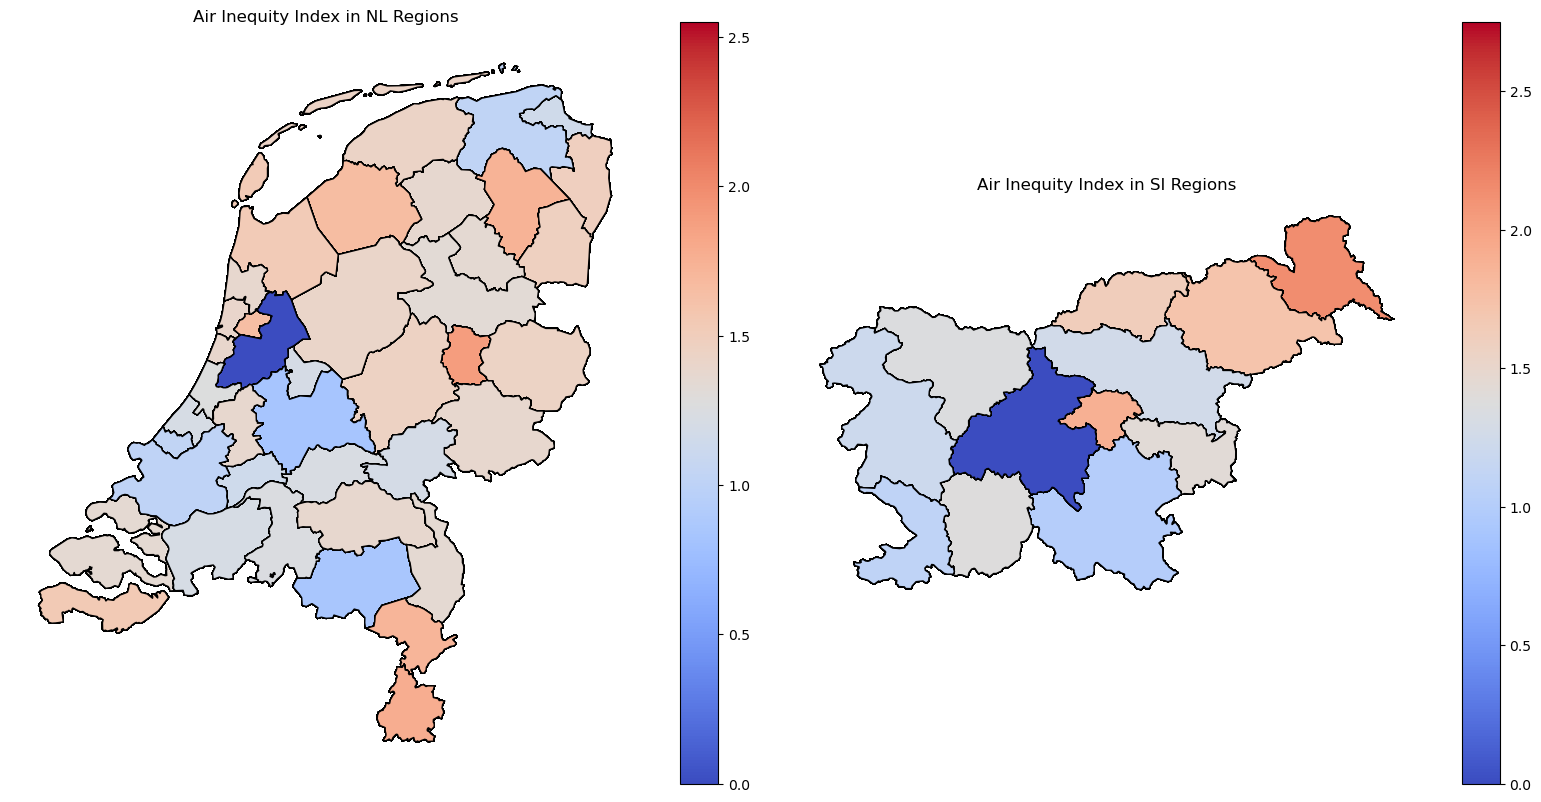

In [79]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Read the shapefiles and extract geometry ---
shapefile_paths = ["NUTS_NL_01m_2024.shp", "NUTS_SL_01m_2024.shp"]  # Provide paths to your shapefiles

gdf_list = []

for shp in shapefile_paths:
    # Read the shapefile
    gdf = gpd.read_file(shp)
    
    # Ensure the CRS is WGS84
    if gdf.crs.to_string() != "EPSG:4326":
        gdf = gdf.to_crs(epsg=4326)
    
    # Select only the NUTS_ID and geometry columns
    gdf = gdf[['NUTS_ID', 'geometry']]
    
    # Rename the geometry column to avoid conflict during merge
    gdf = gdf.rename(columns={'geometry': 'geometry_gdf'})
    
    gdf_list.append(gdf)

# Combine the two GeoDataFrames into one
geometry_gdf = pd.concat(gdf_list, ignore_index=True)

# Optional: drop duplicates if the same NUTS_ID appears in both files
geometry_gdf = geometry_gdf.drop_duplicates(subset='NUTS_ID')

# --- Step 2: Assuming 'df_final_filled' already contains the 'GDP_Normalized' and 'Air Quality Index' columns ---

# Calculate Air Inequity Index
df_final_filled['Air_Inequity_Index'] = df_final_filled['GDP_Normalized'] * df_final_filled['Index']

# --- Step 3: Merge the geometry data into the final dataframe ---
df_final_filled = df_final_filled.merge(geometry_gdf, on='NUTS_ID', how='left')

# --- Step 4: Extract Netherlands (NL) and Slovenia (SI) regions ---
df_NL = df_final_filled[df_final_filled['Country'] == 'NL']
df_SI = df_final_filled[df_final_filled['Country'] == 'SI']

# Convert to GeoDataFrame
gdf_NL = gpd.GeoDataFrame(df_NL, geometry='geometry_gdf', crs="EPSG:4326")
gdf_SI = gpd.GeoDataFrame(df_SI, geometry='geometry_gdf', crs="EPSG:4326")

# --- Step 5: Plot the Air Inequity Index for both countries ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Netherlands (NL)
gdf_NL.plot(column='Air_Inequity_Index', ax=axes[0], legend=True, cmap='coolwarm', edgecolor='black')
axes[0].set_title("Air Inequity Index in NL Regions")
axes[0].set_axis_off()

# Plot for Slovenia (SI)
gdf_SI.plot(column='Air_Inequity_Index', ax=axes[1], legend=True, cmap='coolwarm', edgecolor='black')
axes[1].set_title("Air Inequity Index in SI Regions")
axes[1].set_axis_off()

plt.tight_layout()
plt.show()


In [82]:
df_final_filled.to_csv('final_v2.csv')

In [91]:
gdf = df_final_filled

In [ ]:
gdf['geometry'] = df['geometry'].apply(wkt.loads)
# Convert the DataFrame into a GeoDataFrame, specifying the geometry column and a CRS (e.g., EPSG:4326)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

In [96]:
gd = gpd.GeoDataFrame(gdf, geometry='geometry_gdf', crs="EPSG:4326")

In [103]:
gd = gd.drop(["GDP"], axis=1)

In [ ]:
gd.to_file("final_v2.shp", driver="ESRI Shapefile")

In [109]:
gdf.columns

Index(['NUTS_ID', 'year', 'month', 'NO2', 'SO2', 'CO', 'O3', 'HCHO', 'PM25',
       'GDP', 'geometry', 'population', 'GDP_per_capita', 'O3_quality',
       'CO_quality', 'NO2_quality', 'SO2_quality', 'PM25_quality',
       'HCHO_quality', 'season', 'PM25_weighted_quality',
       'NO2_weighted_quality', 'O3_weighted_quality', 'SO2_weighted_quality',
       'CO_weighted_quality', 'HCHO_weighted_quality', 'Index', 'Country',
       'GDP_Normalized', 'GDP_per_capita_min', 'GDP_per_capita_max',
       'Air_Inequity_Index', 'geometry_gdf'],
      dtype='object')

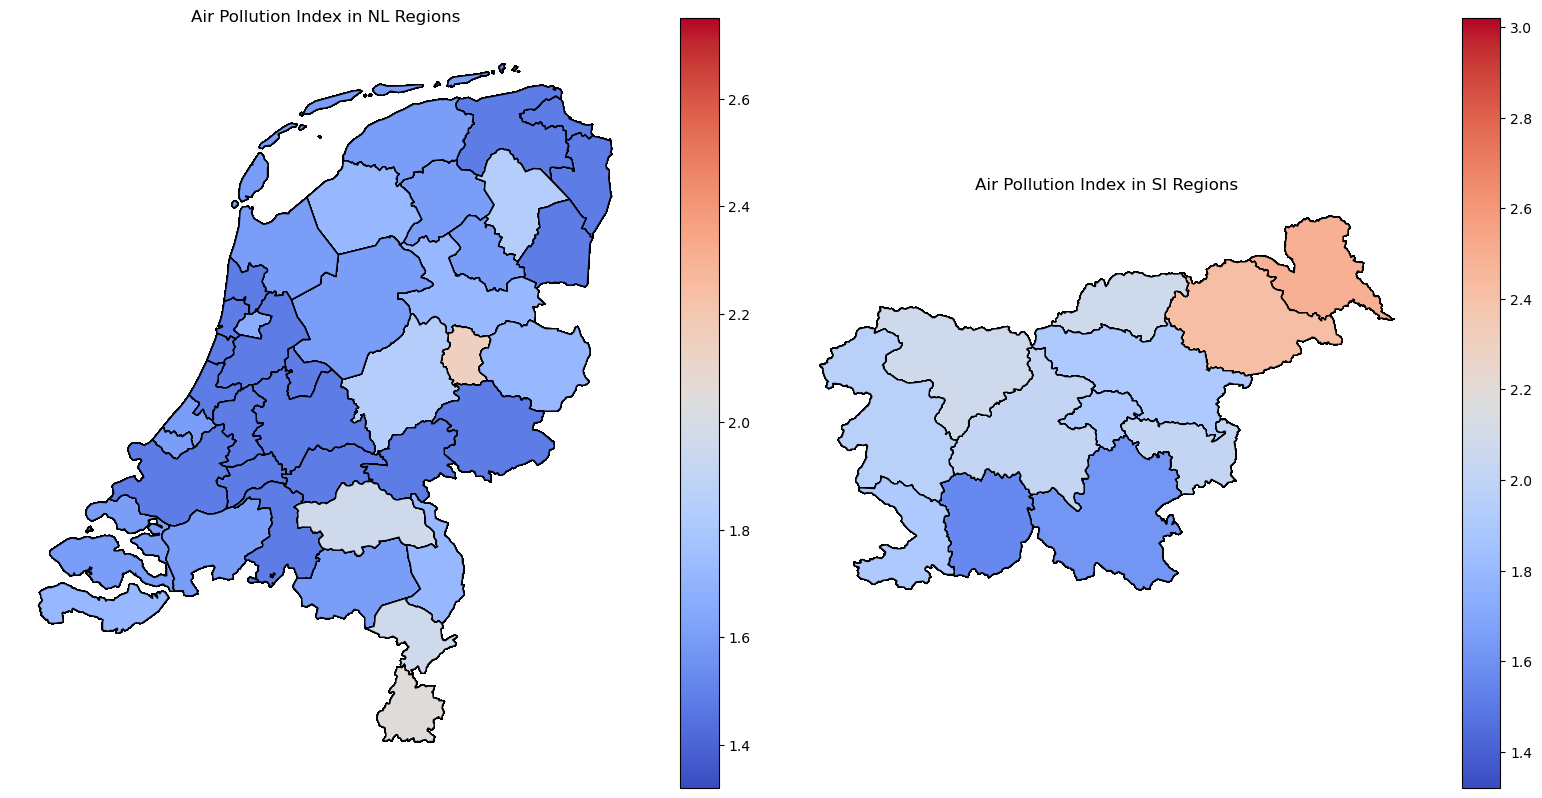

In [106]:
# --- Step 4: Extract Netherlands (NL) and Slovenia (SI) regions ---
df_NL = df_final_filled[df_final_filled['Country'] == 'NL']
df_SI = df_final_filled[df_final_filled['Country'] == 'SI']

# Convert to GeoDataFrame
gdf_NL = gpd.GeoDataFrame(df_NL, geometry='geometry_gdf', crs="EPSG:4326")
gdf_SI = gpd.GeoDataFrame(df_SI, geometry='geometry_gdf', crs="EPSG:4326")

# --- Step 5: Plot the Air Inequity Index for both countries ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Netherlands (NL)
gdf_NL.plot(column='Index', ax=axes[0], legend=True, cmap='coolwarm', edgecolor='black')
axes[0].set_title("Air Pollution Index in NL Regions")
axes[0].set_axis_off()

# Plot for Slovenia (SI)
gdf_SI.plot(column='Index', ax=axes[1], legend=True, cmap='coolwarm', edgecolor='black')
axes[1].set_title("Air Pollution Index in SI Regions")
axes[1].set_axis_off()

plt.tight_layout()
plt.show()


In [110]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file("final_v2.shp")

# Convert and save to GeoJSON
gdf.to_file("out.geojson", driver="GeoJSON")


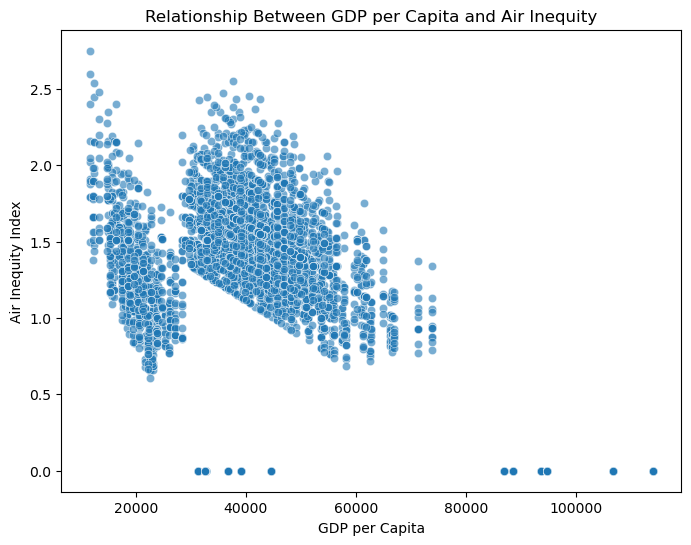

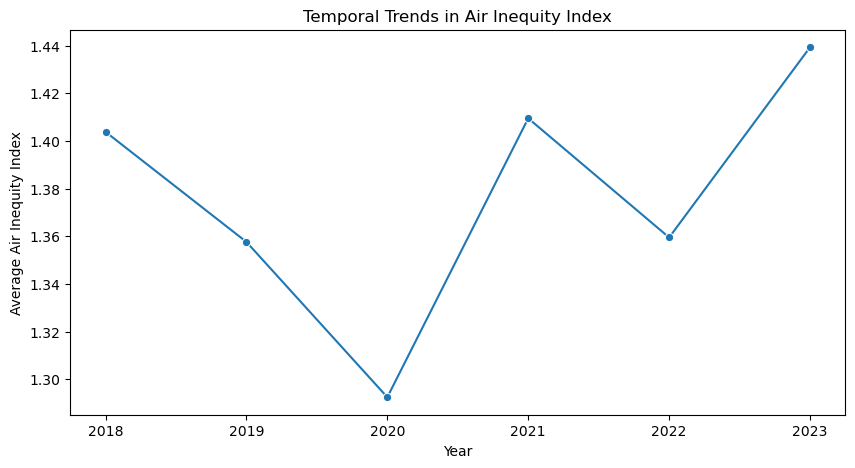

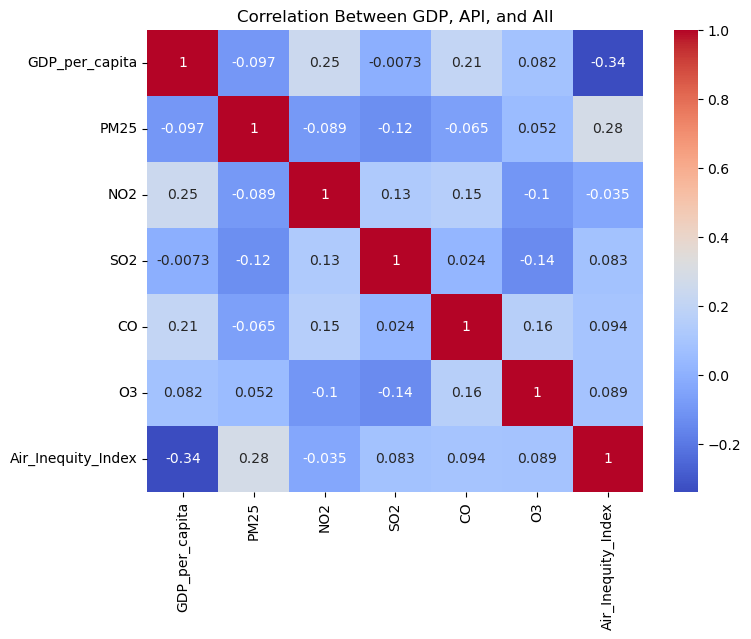

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# 1. Scatter Plot: GDP per Capita vs Air Inequity Index with Highlighted Countries
plt.figure(figsize=(8, 6))

# Default scatter points
sns.scatterplot(data=df, x="GDP_per_capita", y="Air_Inequity_Index", alpha=0.6, color='gray', label="Other Countries")

# Highlight Slovenia
sns.scatterplot(data=df[df["Country"] == "Slovenia"], x="GDP_per_capita", y="Air_Inequity_Index", color='red', label="Slovenia")

# Highlight Netherlands (NL)
sns.scatterplot(data=df[df["Country"] == "NL"], x="GDP_per_capita", y="Air_Inequity_Index", color='blue', label="Netherlands")

plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Relationship Between GDP per Capita and Air Inequity with Highlighted Countries")
plt.legend()
plt.savefig("gdp_vs_inequity_highlighted.png")
plt.show()


# 2. Temporal Trend of Air Inequity Index
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby("year")["Air_Inequity_Index"].mean().reset_index(), x="year", y="Air_Inequity_Index", marker="o")
plt.xlabel("Year")
plt.ylabel("Average Air Inequity Index")
plt.title("Temporal Trends in Air Inequity Index")
plt.savefig("temporal_inequity.png")
plt.show()

# 3. Heatmap: Air Quality vs GDP per Capita
plt.figure(figsize=(8, 6))
sns.heatmap(df[["GDP_per_capita", "PM25", "NO2", "SO2", "CO", "O3", "Air_Inequity_Index"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between GDP, API, and AII")
plt.savefig("correlation_heatmap.png")
plt.show()


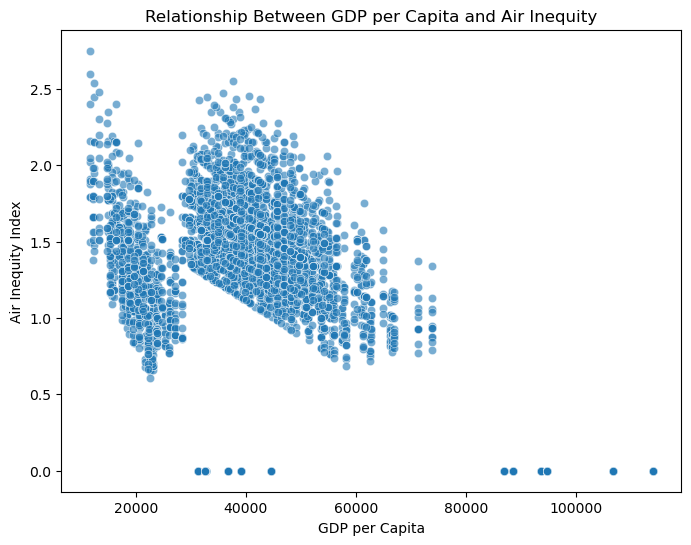

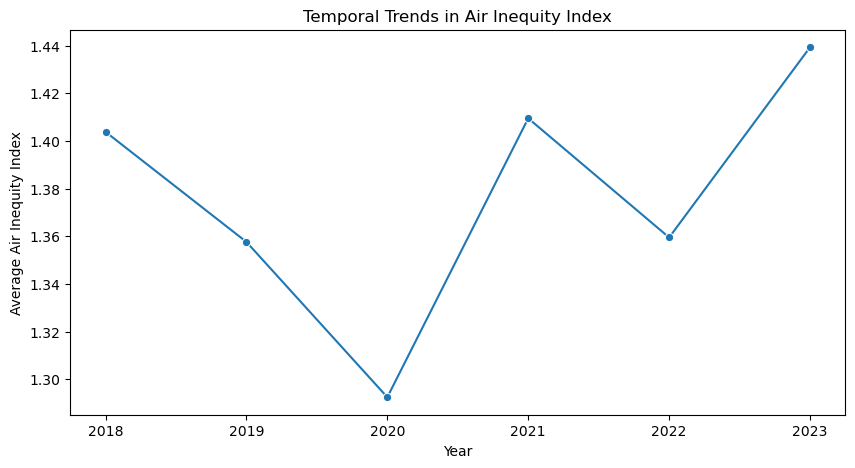

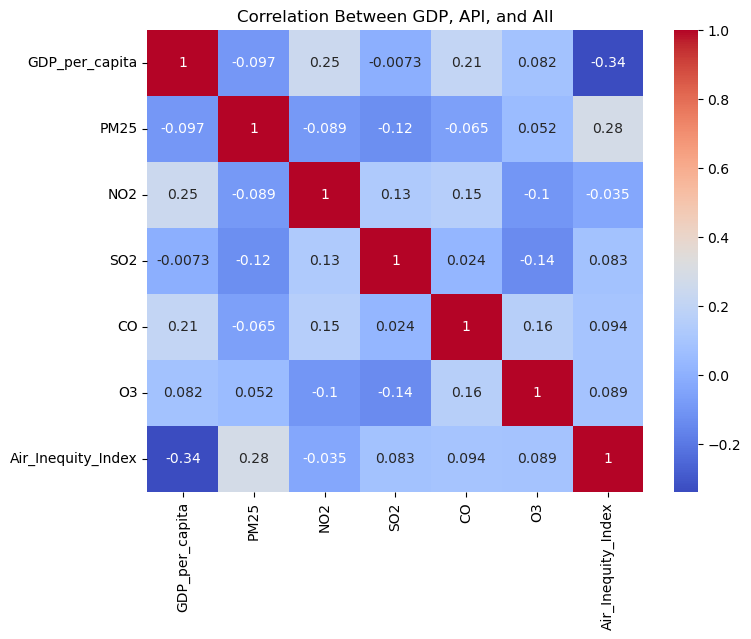

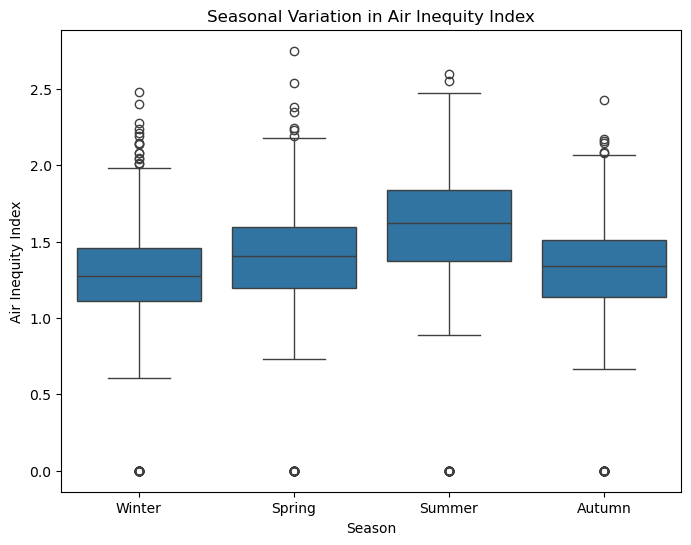

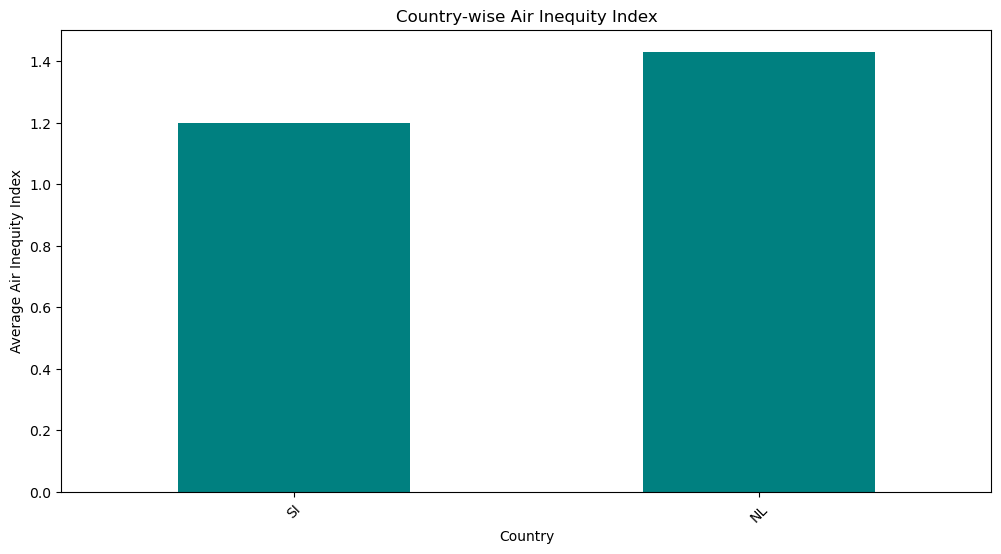

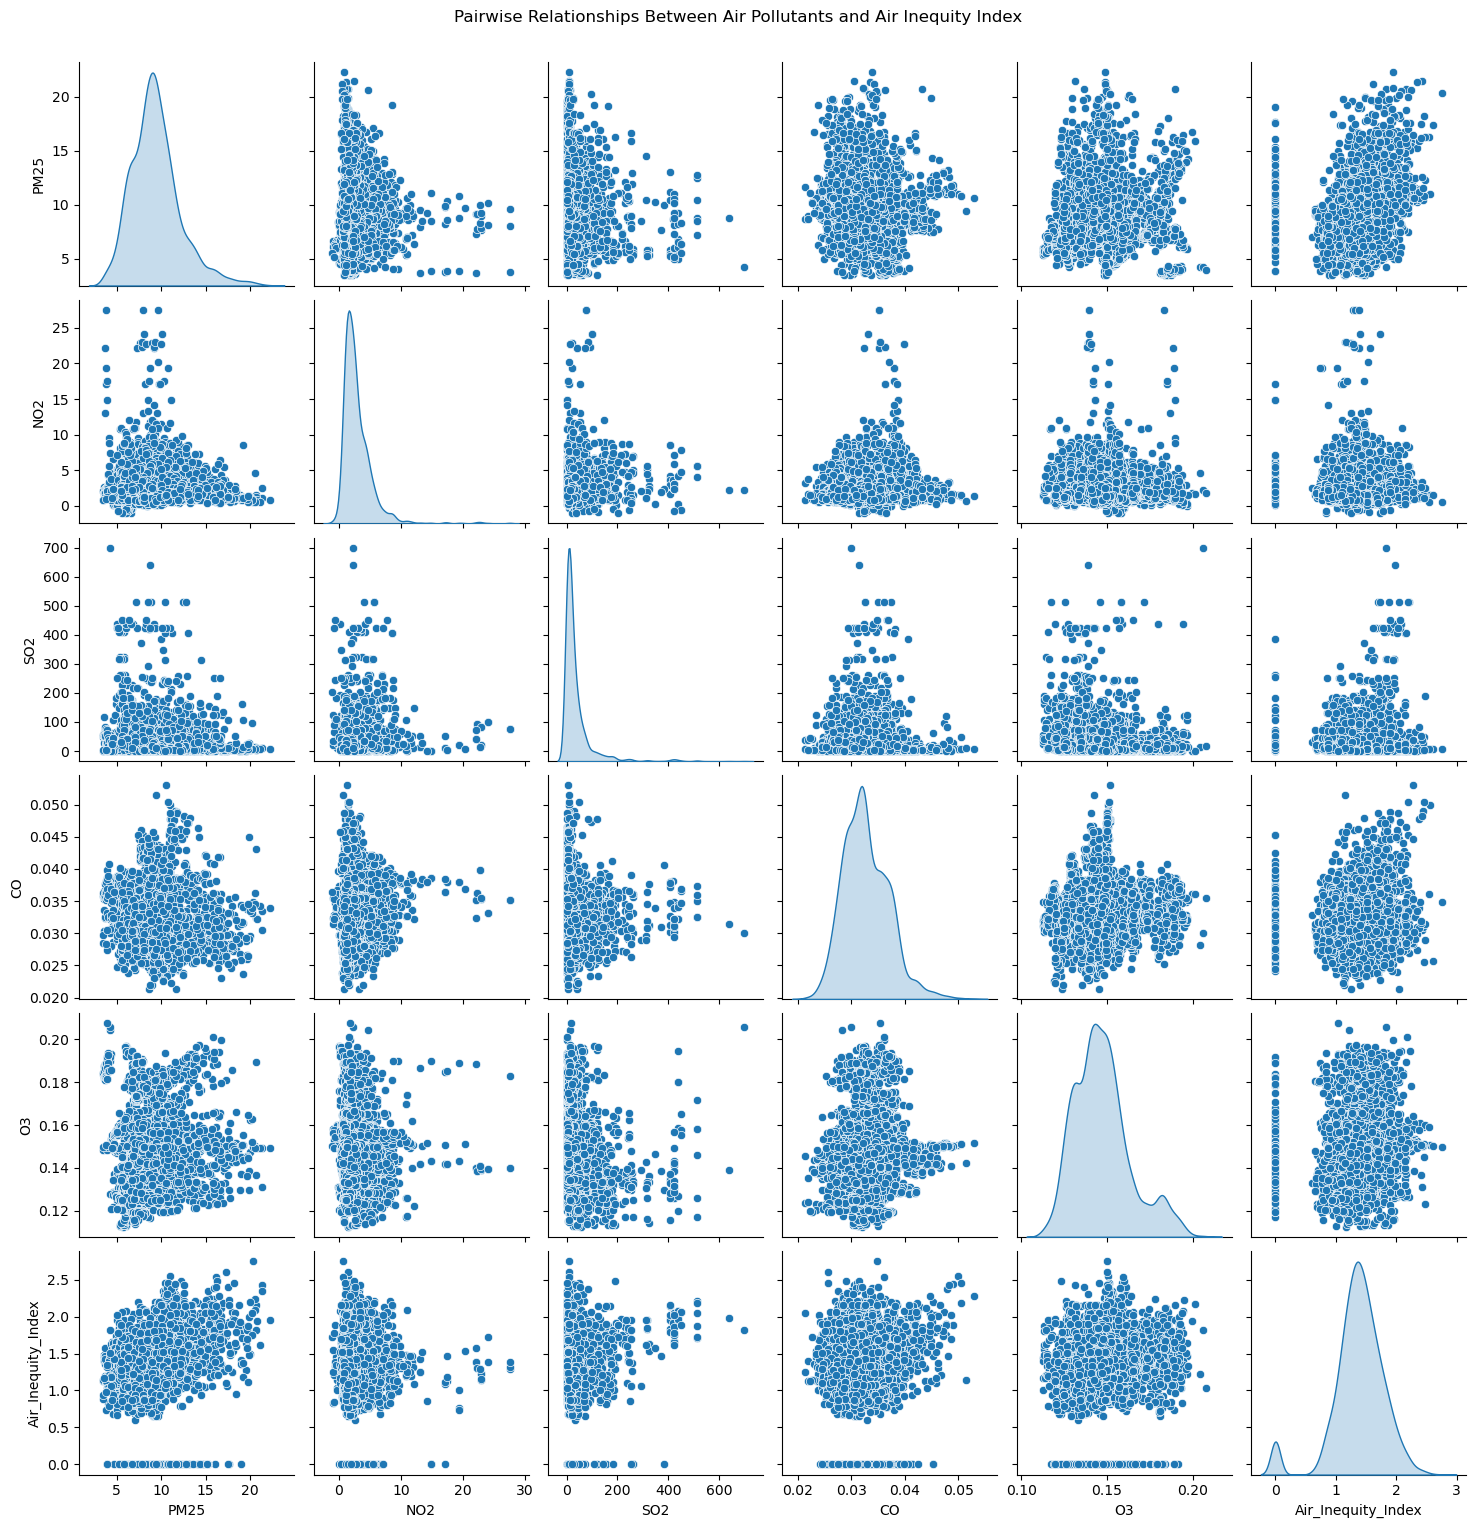

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# 1. Scatter Plot: GDP per Capita vs Air Inequity Index
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="GDP_per_capita", y="Air_Inequity_Index", alpha=0.6)
plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Relationship Between GDP per Capita and Air Inequity")
plt.savefig("gdp_vs_inequity.png")
plt.show()

# 2. Temporal Trend of Air Inequity Index
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby("year")["Air_Inequity_Index"].mean().reset_index(), x="year", y="Air_Inequity_Index", marker="o")
plt.xlabel("Year")
plt.ylabel("Average Air Inequity Index")
plt.title("Temporal Trends in Air Inequity Index")
plt.savefig("temporal_inequity.png")
plt.show()

# 3. Heatmap: Air Quality vs GDP per Capita
plt.figure(figsize=(8, 6))
sns.heatmap(df[["GDP_per_capita", "PM25", "NO2", "SO2", "CO", "O3", "Air_Inequity_Index"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between GDP, API, and AII")
plt.savefig("correlation_heatmap.png")
plt.show()

# 4. Box Plot: Seasonal Variation in Air Inequity Index
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="season", y="Air_Inequity_Index")
plt.xlabel("Season")
plt.ylabel("Air Inequity Index")
plt.title("Seasonal Variation in Air Inequity Index")
plt.savefig("seasonal_variation.png")
plt.show()

# 5. Bar Chart: Country-wise Average Air Inequity Index
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("Country")["Air_Inequity_Index"].mean().sort_values()
df_grouped.plot(kind="bar", color="teal")
plt.xlabel("Country")
plt.ylabel("Average Air Inequity Index")
plt.title("Country-wise Air Inequity Index")
plt.xticks(rotation=45)
plt.savefig("country_inequity.png")
plt.show()

# 6. Pair Plot: Air Pollutants vs Air Inequity Index
sns.pairplot(df, vars=["PM25", "NO2", "SO2", "CO", "O3", "Air_Inequity_Index"], diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Air Pollutants and Air Inequity Index", y=1.02)
plt.savefig("pairplot_air_pollutants.png")
plt.show()

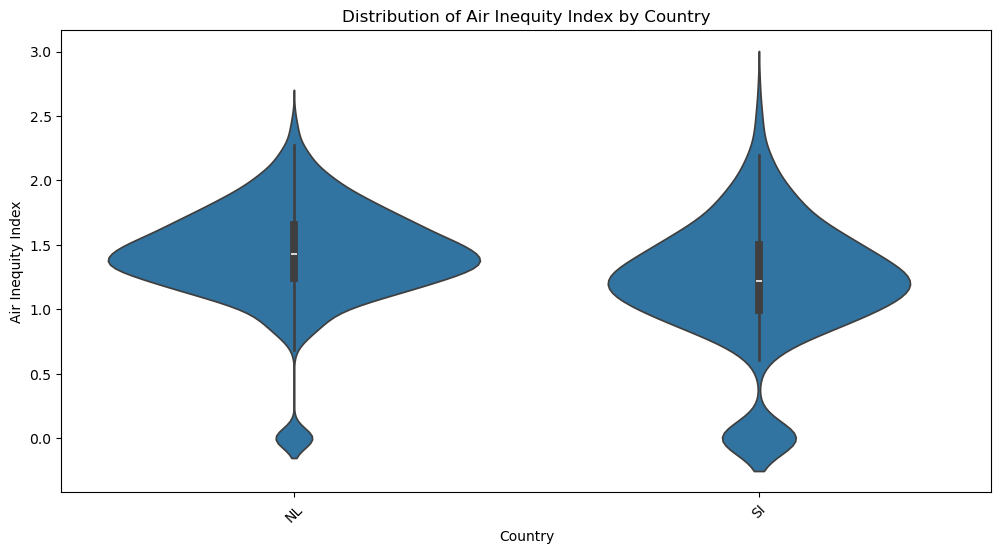

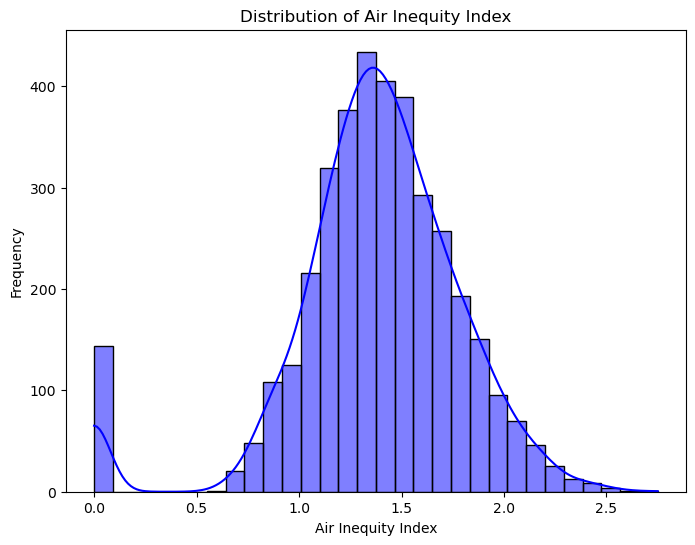

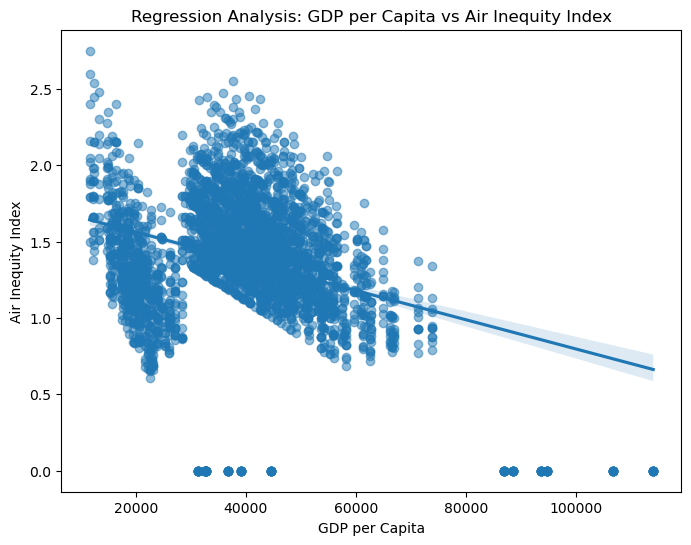

In [124]:
# 7. Violin Plot: Distribution of Air Inequity Index by Country
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Country", y="Air_Inequity_Index")
plt.xlabel("Country")
plt.ylabel("Air Inequity Index")
plt.title("Distribution of Air Inequity Index by Country")
plt.xticks(rotation=45)
plt.savefig("violin_air_inequity.png")
plt.show()

# 8. Histogram: Distribution of Air Inequity Index
plt.figure(figsize=(8, 6))
sns.histplot(df["Air_Inequity_Index"], bins=30, kde=True, color="blue")
plt.xlabel("Air Inequity Index")
plt.ylabel("Frequency")
plt.title("Distribution of Air Inequity Index")
plt.savefig("histogram_air_inequity.png")
plt.show()

# 9. Regression Plot: GDP per Capita vs Air Inequity Index
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="GDP_per_capita", y="Air_Inequity_Index", scatter_kws={"alpha":0.5})
plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Regression Analysis: GDP per Capita vs Air Inequity Index")
plt.savefig("regression_gdp_inequity.png")
plt.show()


/tmp/ipykernel_21759/2335912627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="NUTS_ID", y="Air_Inequity_Index", palette="Reds")


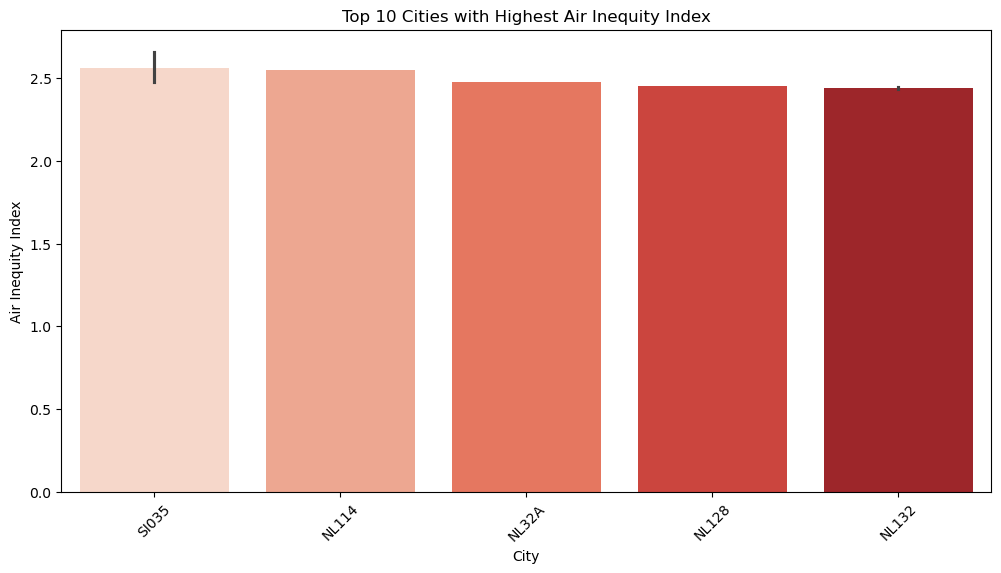

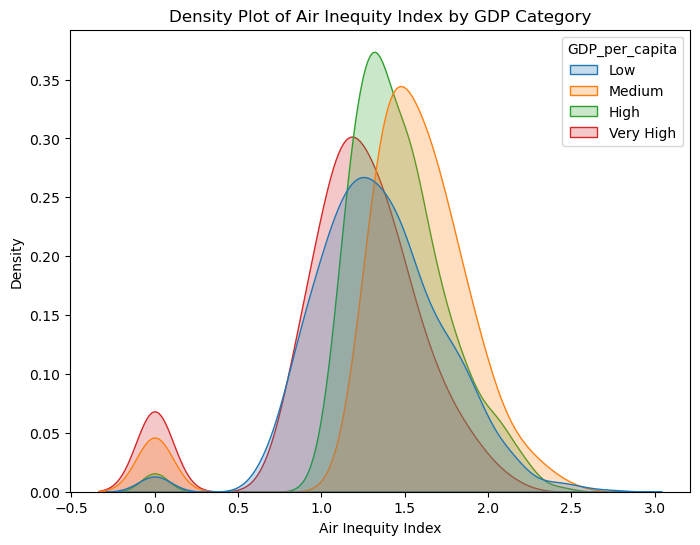

/tmp/ipykernel_21759/2335912627.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="Country", y="Air_Inequity_Index", palette="coolwarm")
/opt/conda/envs/sentinelhub/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/sentinelhub/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


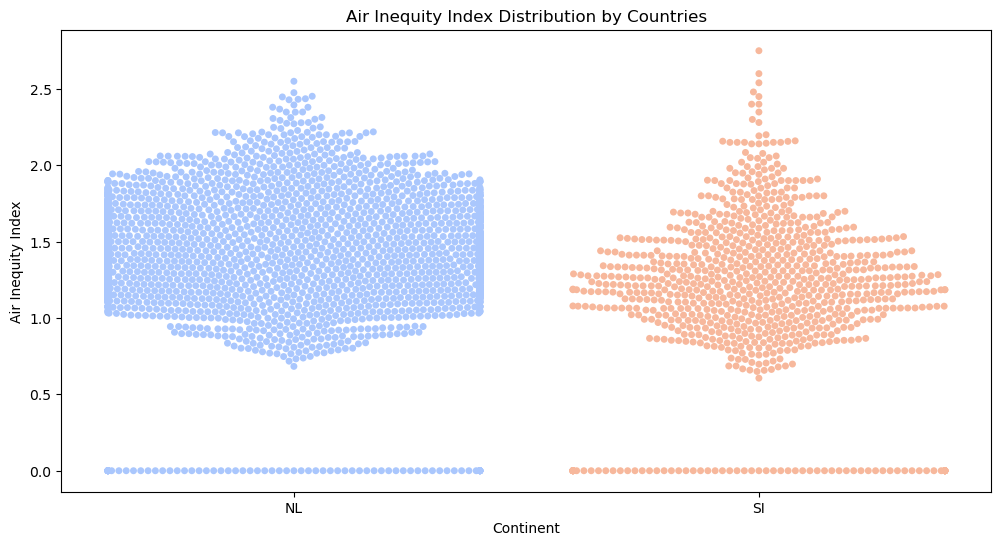

In [129]:


# 10. Bar Chart: Top 10 Cities with Highest Air Inequity Index
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values("Air_Inequity_Index", ascending=False).head(10)
sns.barplot(data=df_sorted, x="NUTS_ID", y="Air_Inequity_Index", palette="Reds")
plt.xlabel("City")
plt.ylabel("Air Inequity Index")
plt.title("Top 10 Cities with Highest Air Inequity Index")
plt.xticks(rotation=45)
plt.savefig("top10_cities_inequity.png")
plt.show()

# 11. KDE Plot: Air Inequity Index Distribution by GDP Category
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="Air_Inequity_Index", hue=pd.qcut(df["GDP_per_capita"], q=4, labels=["Low", "Medium", "High", "Very High"]), fill=True)
plt.xlabel("Air Inequity Index")
plt.ylabel("Density")
plt.title("Density Plot of Air Inequity Index by GDP Category")
plt.savefig("kde_gdp_inequity.png")
plt.show()

# 12. Swarm Plot: Air Inequity Index by Continent
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x="Country", y="Air_Inequity_Index", palette="coolwarm")
plt.xlabel("Continent")
plt.ylabel("Air Inequity Index")
plt.title("Air Inequity Index Distribution by Countries")
plt.savefig("swarm_continent_inequity.png")
plt.show()





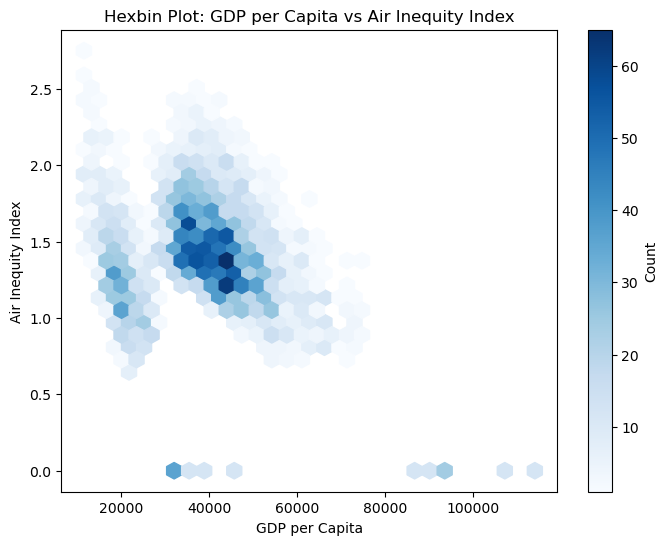

In [130]:
plt.figure(figsize=(8, 6))
plt.hexbin(df["GDP_per_capita"], df["Air_Inequity_Index"], gridsize=30, cmap="Blues", mincnt=1)
plt.colorbar(label="Count")
plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Hexbin Plot: GDP per Capita vs Air Inequity Index")
plt.savefig("hexbin_gdp_inequity.png")
plt.show()

/tmp/ipykernel_21759/1754491613.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bins)["Air_Inequity_Index"].mean().reset_index()


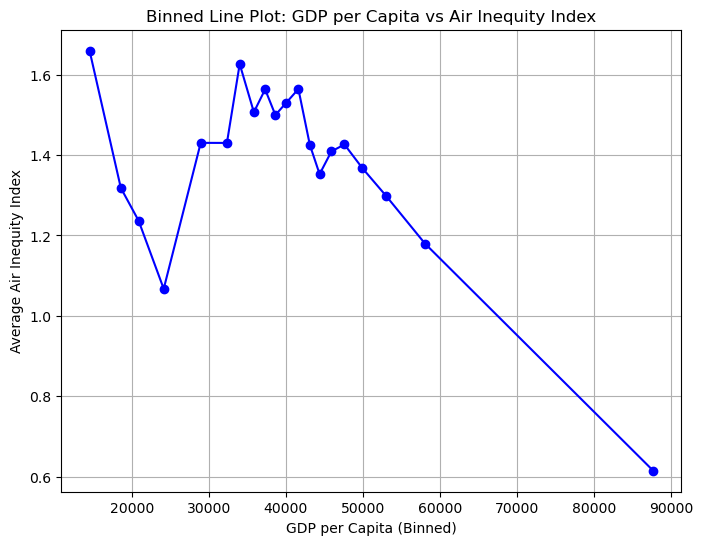

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# 1. Binned Line Plot: GDP per Capita vs Air Inequity Index
bins = pd.qcut(df["GDP_per_capita"], q=20, duplicates='drop')
grouped = df.groupby(bins)["Air_Inequity_Index"].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(grouped["GDP_per_capita"].apply(lambda x: x.mid), grouped["Air_Inequity_Index"], marker='o', linestyle='-', color='blue')
plt.xlabel("GDP per Capita (Binned)")
plt.ylabel("Average Air Inequity Index")
plt.title("Binned Line Plot: GDP per Capita vs Air Inequity Index")
plt.grid(True)
plt.savefig("binned_line_gdp_inequity.png")
plt.show()


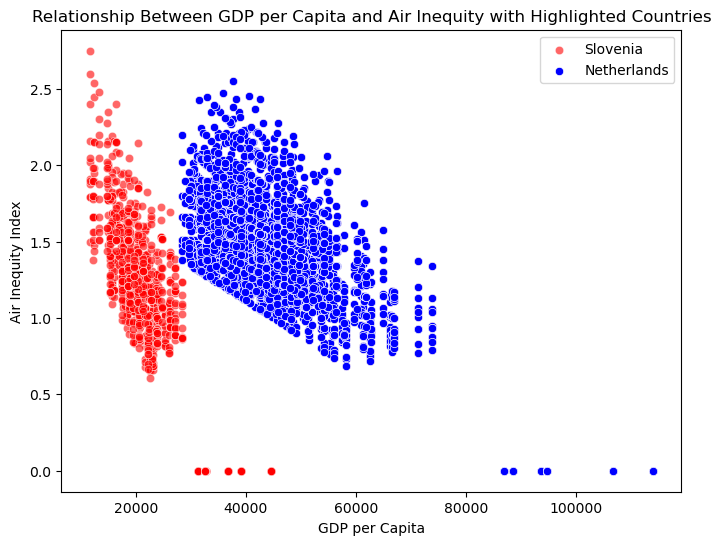

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# 1. Scatter Plot: GDP per Capita vs Air Inequity Index with Highlighted Countries
plt.figure(figsize=(8, 6))

# Default scatter points
sns.scatterplot(data=df, x="GDP_per_capita", y="Air_Inequity_Index", alpha=0.6, color='red', label="Slovenia")

# Highlight Slovenia
sns.scatterplot(data=df[df["Country"] == "SL"], x="GDP_per_capita", y="Air_Inequity_Index", color='red', label="Slovenia")

# Highlight Netherlands (NL)
sns.scatterplot(data=df[df["Country"] == "NL"], x="GDP_per_capita", y="Air_Inequity_Index", color='blue', label="Netherlands")

plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Relationship Between GDP per Capita and Air Inequity with Highlighted Countries")
plt.legend()
plt.savefig("gdp_vs_inequity_highlighted.png")
plt.show()
#lower the gdp, the higher the 


In [159]:
def min_max(ret):
    return (ret - min(ret)) / (max(ret) - min(ret))

gdps_nl = min_max(df[df["Country"] == "NL"].GDP_per_capita)
gdps_si = min_max(df[df["Country"] == "SI"].GDP_per_capita)


In [167]:
df_nl_ = df[df["Country"] == "NL"]
df_nl_.GDP_per_capita = min_max(df_nl_.GDP_per_capita)
df_si_ = df[df["Country"] == "SI"]
df_si_.GDP_per_capita = min_max(df_si_.GDP_per_capita)

/tmp/ipykernel_21759/3950568589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nl_.GDP_per_capita = min_max(df_nl_.GDP_per_capita)
/tmp/ipykernel_21759/3950568589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_si_.GDP_per_capita = min_max(df_si_.GDP_per_capita)


In [169]:
df_nl_.GDP_per_capita

0       0.294322
1       0.294322
2       0.294322
3       0.294322
4       0.294322
          ...   
2875    0.228864
2876    0.228864
2877    0.228864
2878    0.228864
2879    0.228864
Name: GDP_per_capita, Length: 2880, dtype: float64

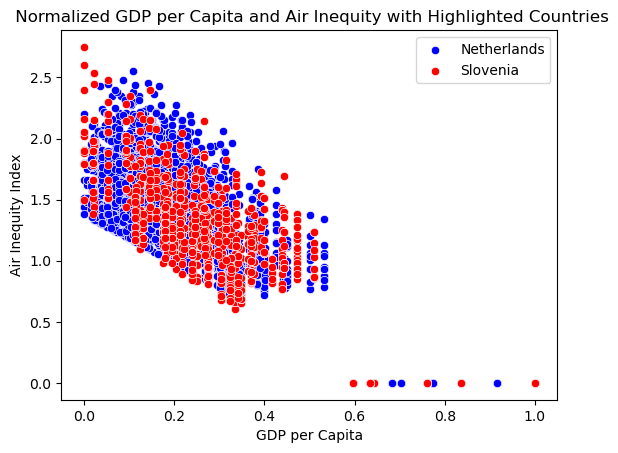

In [176]:
# Highlight Slovenia
sns.scatterplot(data=df_nl_, x="GDP_per_capita", y="Air_Inequity_Index", color='blue', label="Netherlands")
sns.scatterplot(data=df_si_, x="GDP_per_capita", y="Air_Inequity_Index", color='red', label="Slovenia")
plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title(" Normalized GDP per Capita and Air Inequity with Highlighted Countries")
plt.legend()
plt.savefig("gdp_vs_inequity_highlighted.png")
plt.show()

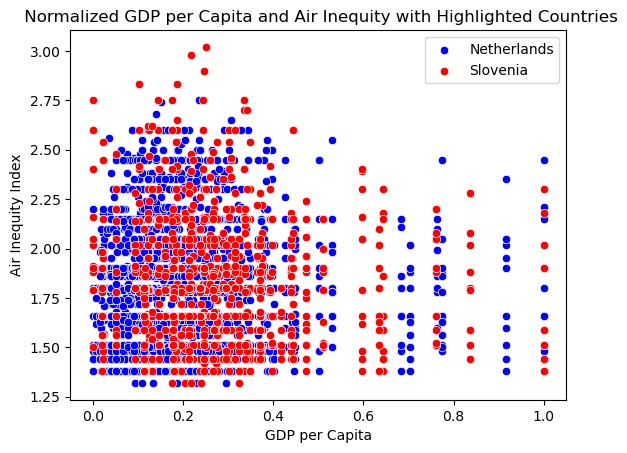

In [177]:
# Highlight Slovenia
sns.scatterplot(data=df_nl_, x="GDP_per_capita", y="Index", color='blue', label="Netherlands")
sns.scatterplot(data=df_si_, x="GDP_per_capita", y="Index", color='red', label="Slovenia")
plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title(" Normalized GDP per Capita and Air Inequity with Highlighted Countries")
plt.legend()
plt.savefig("gdp_vs_inequity_highlighted.png")
plt.show()

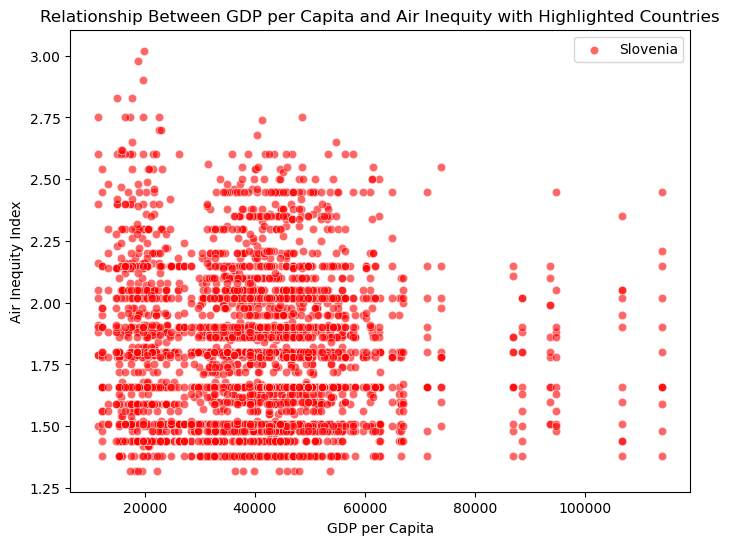

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# 1. Scatter Plot: GDP per Capita vs Air Inequity Index with Highlighted Countries
plt.figure(figsize=(8, 6))

# Default scatter points
sns.scatterplot(data=df, x="GDP_per_capita", y="Index", alpha=0.6, color='red', label="Slovenia")

# Highlight Slovenia
sns.scatterplot(data=df[df["Country"] == "SL"], x="GDP_per_capita", y="Index", color='red', label="Slovenia")

# Highlight Netherlands (NL)
#sns.scatterplot(data=df[df["Country"] == "NL"], x="GDP_per_capita", y="Index", color='blue', label="Netherlands")

plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Relationship Between GDP per Capita and Air Inequity with Highlighted Countries")
plt.legend()
plt.savefig("gdp_vs_inequity_highlighted.png")
plt.show()
#lower the gdp, the higher the 


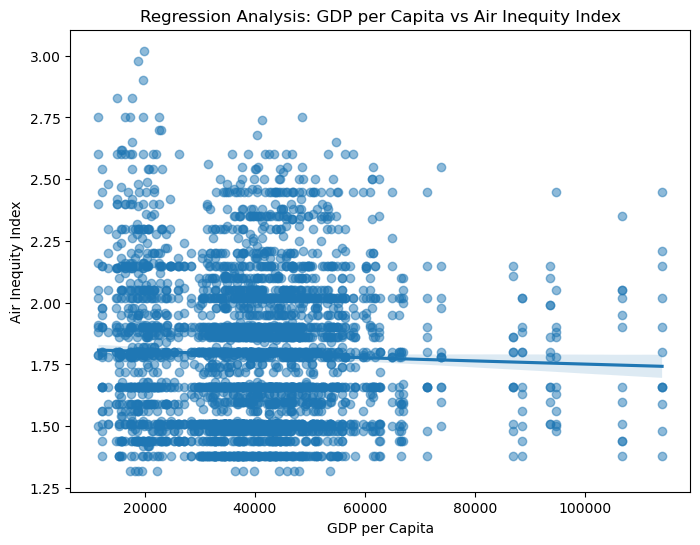

In [180]:
# 9. Regression Plot: GDP per Capita vs Air Inequity Index
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="GDP_per_capita", y="Index", scatter_kws={"alpha":0.5})
plt.xlabel("GDP per Capita")
plt.ylabel("Air Inequity Index")
plt.title("Regression Analysis: GDP per Capita vs Air Inequity Index")
plt.savefig("regression_gdp_inequity.png")
plt.show()

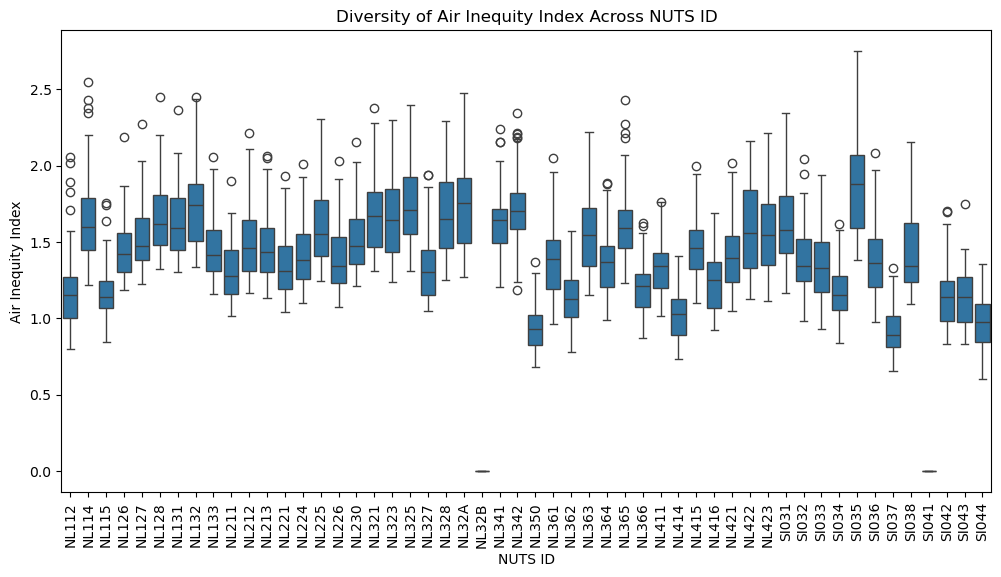

In [181]:
# 2. Box Plot: Diversity of Air Inequity Index Across NUTS_ID
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="NUTS_ID", y="Air_Inequity_Index")
plt.xlabel("NUTS ID")
plt.ylabel("Air Inequity Index")
plt.title("Diversity of Air Inequity Index Across NUTS ID")
plt.xticks(rotation=90)
plt.savefig("nuts_air_inequity_diversity.png")
plt.show()

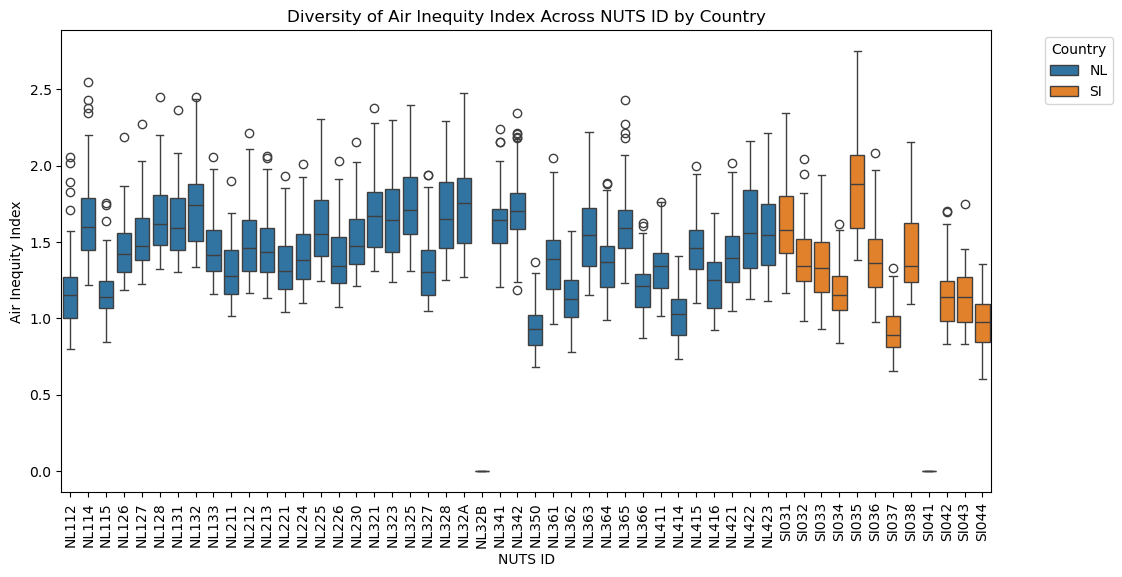

In [182]:
# 2. Box Plot: Diversity of Air Inequity Index Across NUTS_ID with Different Colors for Countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="NUTS_ID", y="Air_Inequity_Index", hue="Country", palette="tab10")
plt.xlabel("NUTS ID")
plt.ylabel("Air Inequity Index")
plt.title("Diversity of Air Inequity Index Across NUTS ID by Country")
plt.xticks(rotation=90)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("nuts_air_inequity_diversity_colored.png", bbox_inches='tight')
plt.show()


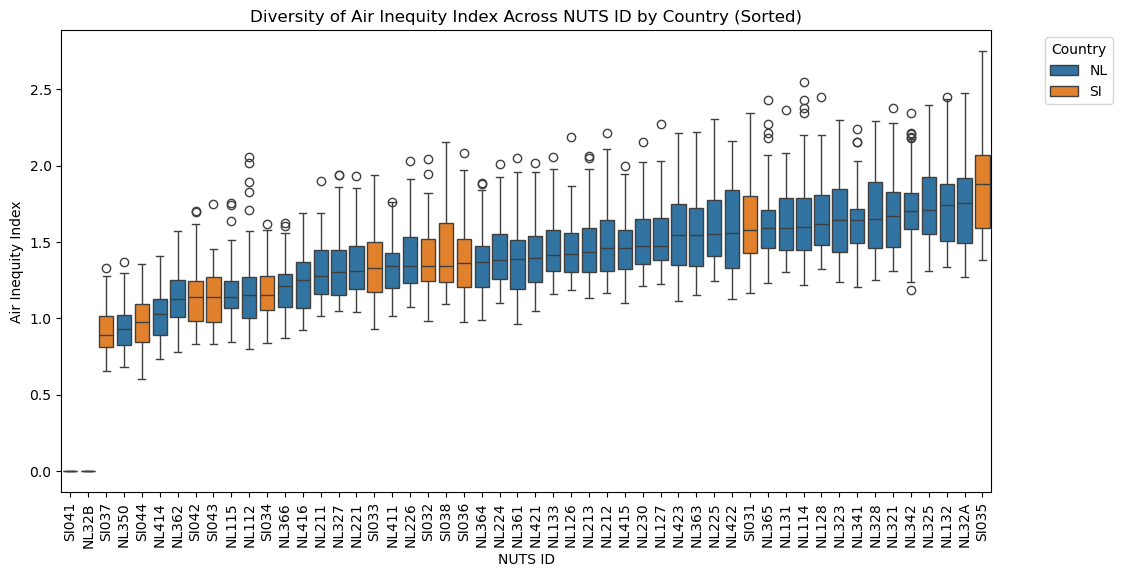

In [184]:
df_sorted = df.groupby("NUTS_ID")["Air_Inequity_Index"].median().sort_values().index
df["NUTS_ID"] = pd.Categorical(df["NUTS_ID"], categories=df_sorted, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="NUTS_ID", y="Air_Inequity_Index", hue="Country", palette="tab10")
plt.xlabel("NUTS ID")
plt.ylabel("Air Inequity Index")
plt.title("Diversity of Air Inequity Index Across NUTS ID by Country (Sorted)")
plt.xticks(rotation=90)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("nuts_air_inequity_diversity_sorted.png", bbox_inches='tight')
plt.show()


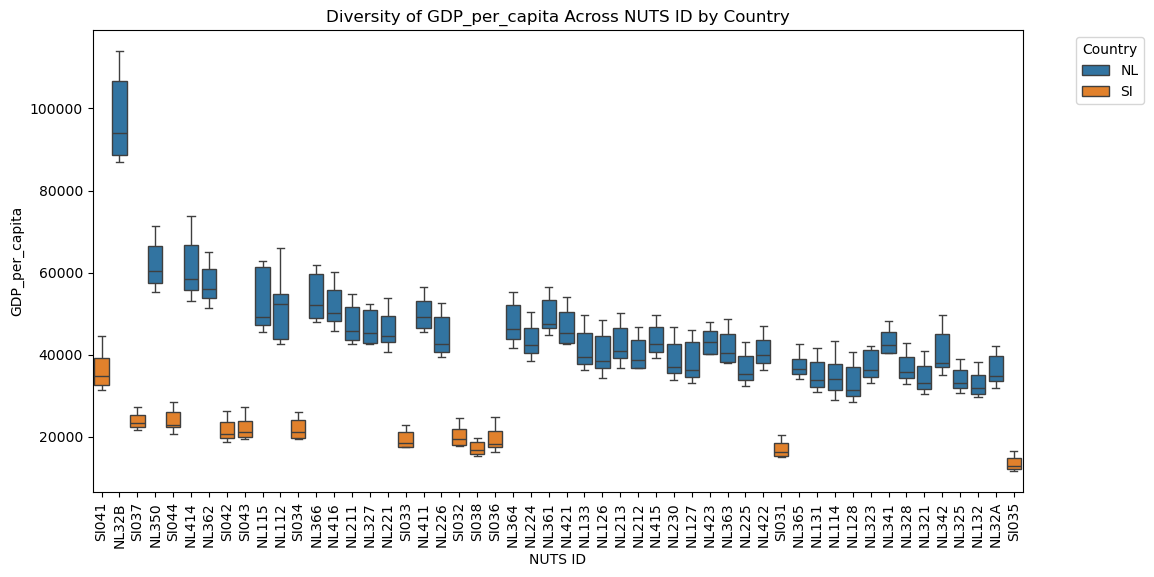

In [188]:
# 2. Box Plot: Diversity of Air Inequity Index Across NUTS_ID with Different Colors for Countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="NUTS_ID", y="GDP_per_capita", hue="Country", palette="tab10")
plt.xlabel("NUTS ID")
plt.ylabel("GDP_per_capita")
plt.title("Diversity of GDP_per_capita Across NUTS ID by Country")
plt.xticks(rotation=90)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("nuts_GDP_per_capita_diversity_colored.png", bbox_inches='tight')
plt.show()


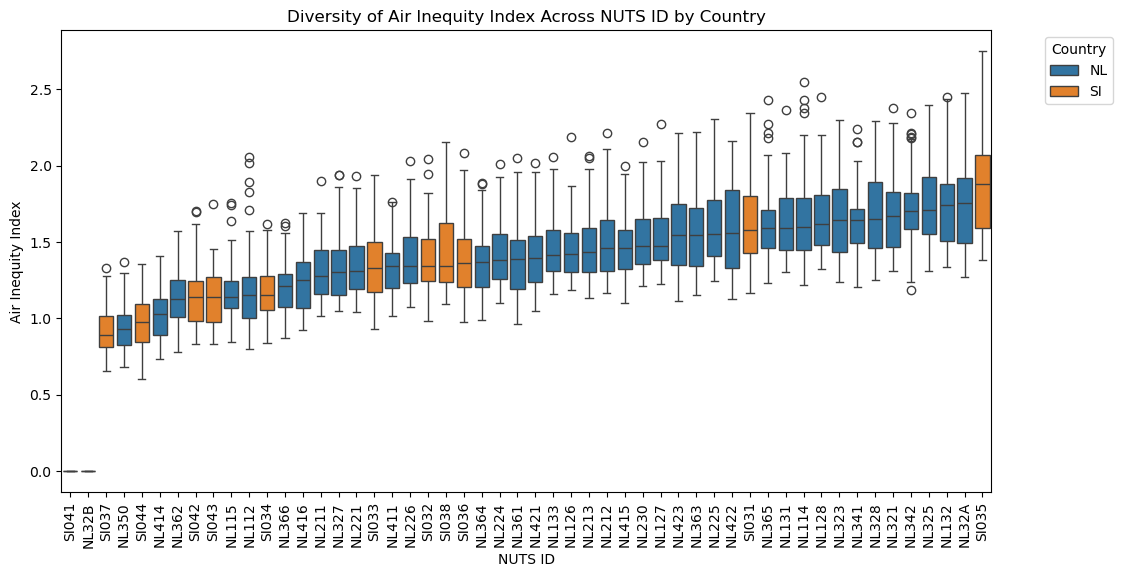

In [189]:
# 2. Box Plot: Diversity of Air Inequity Index Across NUTS_ID with Different Colors for Countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="NUTS_ID", y="Air_Inequity_Index", hue="Country", palette="tab10")
plt.xlabel("NUTS ID")
plt.ylabel("Air Inequity Index")
plt.title("Diversity of Air Inequity Index Across NUTS ID by Country")
plt.xticks(rotation=90)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("nuts_air_inequity_diversity_colored.png", bbox_inches='tight')
plt.show()


In [192]:
df

Unnamed: 0 NUTS_ID  year  month       NO2    SO2        CO        O3  \
0              0   NL112  2018      1  0.480218  63.22  0.032802  0.182354   
1              1   NL112  2018      2  2.049908  49.09  0.035762  0.136167   
2              2   NL112  2018      3  0.966513   1.17  0.037744  0.158723   
3              3   NL112  2018      4  1.711622   0.65  0.037768  0.168643   
4              4   NL112  2018      5  2.753763  16.57  0.030604  0.151060   
...          ...     ...   ...    ...       ...    ...       ...       ...   
3739        3739   SI044  2023      8  0.707374  10.85  0.051438  0.142255   
3740        3740   SI044  2023      9  1.184261  67.30  0.030808  0.124775   
3741        3741   SI044  2023     10  1.361142   1.33  0.028556  0.149627   
3742        3742   SI044  2023     11  2.238057  11.42  0.030413  0.134300   
3743        3743   SI044  2023     12  1.488782  72.36  0.030810  0.133060   

      HCHO      PM25  ...  O3_weighted_quality SO2_weighted_quality  \
0     0.25   9.13472  ...                 0.40                 0.24   
1     4.22   7.29672  ...                 0.30                 0.12   
2     0.20  10.68873  ...                 0.60                 0.12   
3     1.27  11.92120  ...                 0.60                 0.12   
4     3.86  10.06222  ...                 0.60                 0.12   
...    ...       ...  ...                  ...                  ...   
3739  4.28   9.42605  ...                 0.90                 0.05   
3740  4.82   9.86098  ...                 0.45                 0.24   
3741  1.79  10.43460  ...                 0.45                 0.12   
3742  2.05   6.66507  ...                 0.45                 0.12   
3743  2.26  10.49228  ...                 0.30                 0.24   

      CO_weighted_quality  HCHO_weighted_quality  Index  Country  \
0                    0.24                   0.07   1.60       NL   
1                    0.24                   0.07   1.38       NL   
2                    0.28                   0.08   2.02       NL   
3                    0.28                   0.08   2.02       NL   
4                    0.28                   0.08   2.02       NL   
...                   ...                    ...    ...      ...   
3739                 0.50                   0.15   2.00       SI   
3740                 0.28                   0.08   1.63       SI   
3741                 0.21                   0.08   1.79       SI   
3742                 0.28                   0.08   1.51       SI   
3743                 0.24                   0.07   1.90       SI   

      GDP_Normalized  GDP_per_capita_min  GDP_per_capita_max  \
0           0.581486        28379.503546        88559.452555   
1           0.581486        28379.503546        88559.452555   
2           0.581486        28379.503546        88559.452555   
3           0.581486        28379.503546        88559.452555   
4           0.581486        28379.503546        88559.452555   
...              ...                 ...                 ...   
3739        0.573914        16456.783656        44567.397508   
3740        0.573914        16456.783656        44567.397508   
3741        0.573914        16456.783656        44567.397508   
3742        0.573914        16456.783656        44567.397508   
3743        0.573914        16456.783656        44567.397508   

      Air_Inequity_Index  
0               0.930378  
1               0.802451  
2               1.174602  
3               1.174602  
4               1.174602  
...                  ...  
3739            1.147827  
3740            0.935479  
3741            1.027305  
3742            0.866610  
3743            1.090436  

[3744 rows x 33 columns]

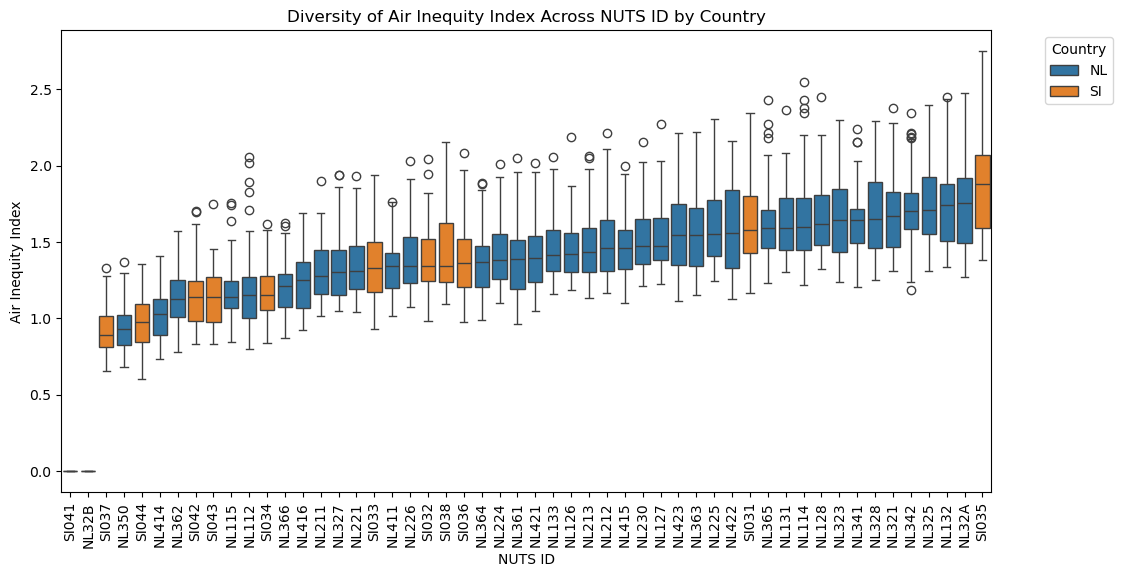

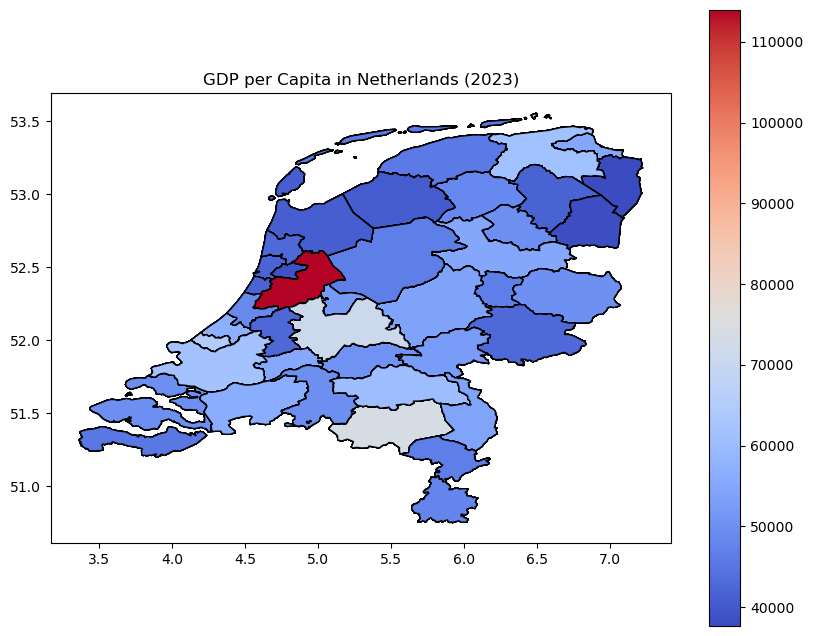

In [197]:

# 3. Map Plot: GDP per Capita for Netherlands (NL) in 2023
df_nl = df[(df["Country"] == "NL") & (df["year"] == 2023)]

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_nl, geometry=gpd.GeoSeries.from_wkt(df_nl["geometry"]))

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column="GDP_per_capita", cmap="coolwarm", legend=True, ax=ax, edgecolor="black")
plt.title("GDP per Capita in Netherlands (2023)")
plt.savefig("gdp_per_capita_nl_2023.png", bbox_inches='tight')
plt.show()


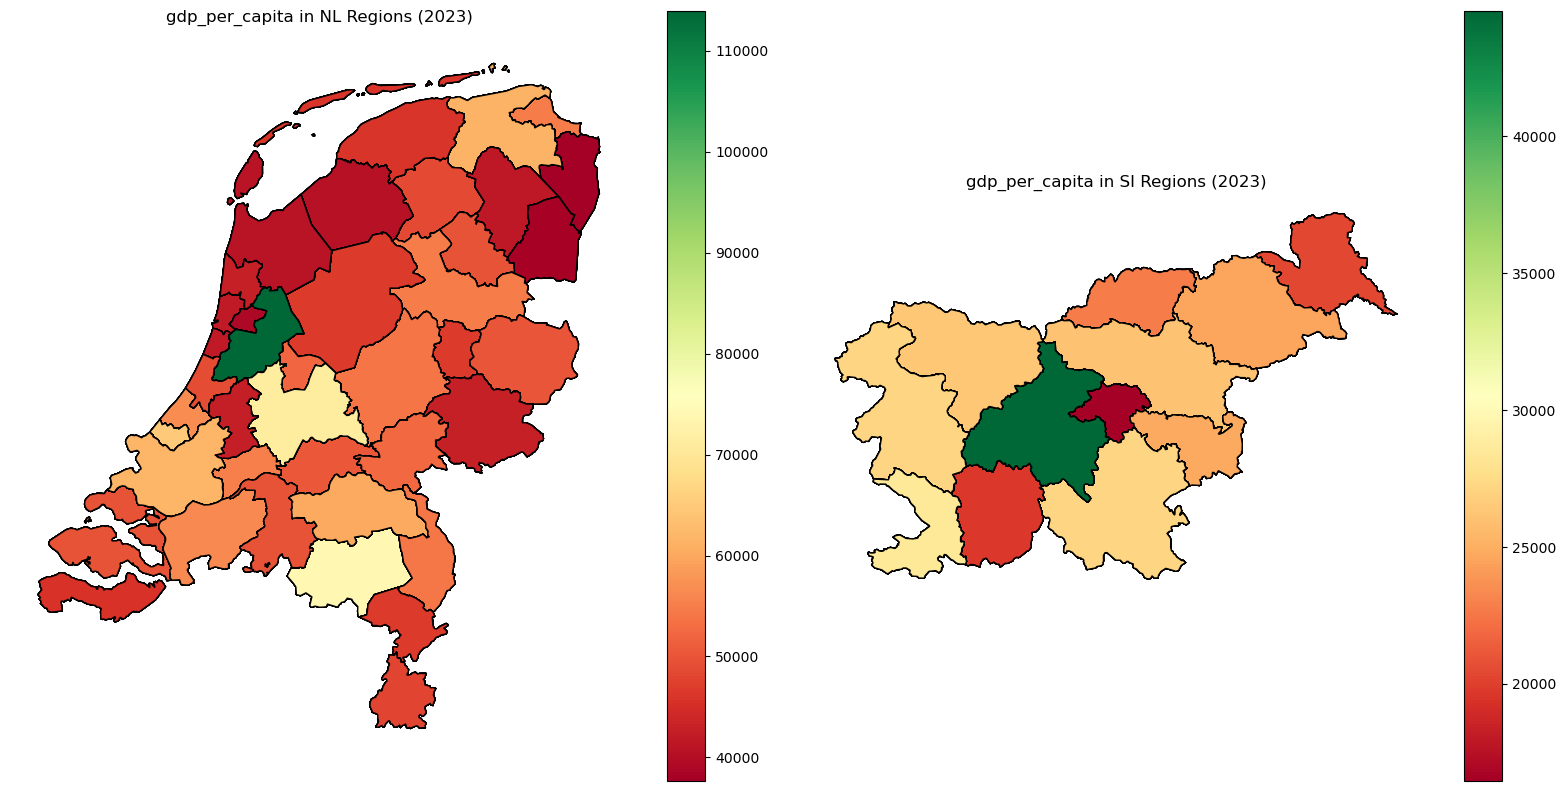

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]

# Extract Netherlands (NL) and Slovenia (SI) regions
df_NL = df_2023[df_2023['Country'] == 'NL']
df_SI = df_2023[df_2023['Country'] == 'SI']

# Convert to GeoDataFrame
gdf_NL = gpd.GeoDataFrame(df_NL, geometry=gpd.GeoSeries.from_wkt(df_NL['geometry']), crs="EPSG:4326")
gdf_SI = gpd.GeoDataFrame(df_SI, geometry=gpd.GeoSeries.from_wkt(df_SI['geometry']), crs="EPSG:4326")

# Plot Air Inequity Index for both countries
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Netherlands (NL)
gdf_NL.plot(column='GDP_per_capita', ax=axes[0], legend=True, cmap='RdYlGn', edgecolor='black')
axes[0].set_title("gdp_per_capita in NL Regions (2023)")
axes[0].set_axis_off()

# Plot for Slovenia (SI)
gdf_SI.plot(column='GDP_per_capita', ax=axes[1], legend=True, cmap='RdYlGn', edgecolor='black')
axes[1].set_title("gdp_per_capita in SI Regions (2023)")
axes[1].set_axis_off()

plt.tight_layout()
plt.savefig("gdp_per_capita.png", bbox_inches='tight')
plt.show()


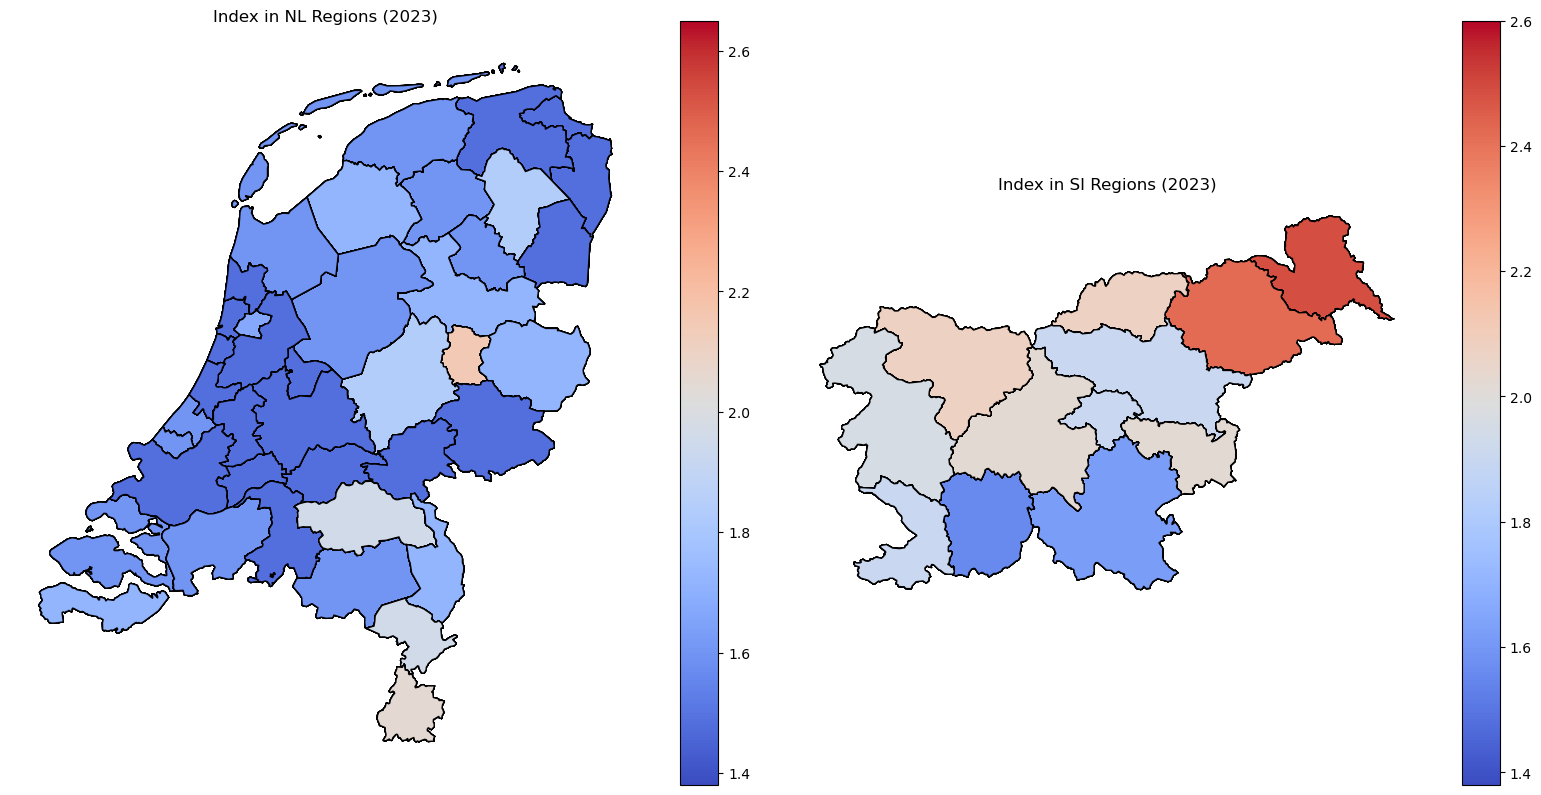

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load data
file_path = "final_v2.csv"
df = pd.read_csv(file_path)

# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]

# Extract Netherlands (NL) and Slovenia (SI) regions
df_NL = df_2023[df_2023['Country'] == 'NL']
df_SI = df_2023[df_2023['Country'] == 'SI']

# Convert to GeoDataFrame
gdf_NL = gpd.GeoDataFrame(df_NL, geometry=gpd.GeoSeries.from_wkt(df_NL['geometry']), crs="EPSG:4326")
gdf_SI = gpd.GeoDataFrame(df_SI, geometry=gpd.GeoSeries.from_wkt(df_SI['geometry']), crs="EPSG:4326")

# Plot Air Inequity Index for both countries
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Netherlands (NL)
gdf_NL.plot(column='Index', ax=axes[0], legend=True, cmap='coolwarm', edgecolor='black')
axes[0].set_title("Index in NL Regions (2023)")
axes[0].set_axis_off()

# Plot for Slovenia (SI)
gdf_SI.plot(column='Index', ax=axes[1], legend=True, cmap='coolwarm', edgecolor='black')
axes[1].set_title("Index in SI Regions (2023)")
axes[1].set_axis_off()

plt.tight_layout()
plt.savefig("Index.png", bbox_inches='tight')
plt.show()


In [204]:
df

Unnamed: 0 NUTS_ID  year  month       NO2    SO2        CO        O3  \
0              0   NL112  2018      1  0.480218  63.22  0.032802  0.182354   
1              1   NL112  2018      2  2.049908  49.09  0.035762  0.136167   
2              2   NL112  2018      3  0.966513   1.17  0.037744  0.158723   
3              3   NL112  2018      4  1.711622   0.65  0.037768  0.168643   
4              4   NL112  2018      5  2.753763  16.57  0.030604  0.151060   
...          ...     ...   ...    ...       ...    ...       ...       ...   
3739        3739   SI044  2023      8  0.707374  10.85  0.051438  0.142255   
3740        3740   SI044  2023      9  1.184261  67.30  0.030808  0.124775   
3741        3741   SI044  2023     10  1.361142   1.33  0.028556  0.149627   
3742        3742   SI044  2023     11  2.238057  11.42  0.030413  0.134300   
3743        3743   SI044  2023     12  1.488782  72.36  0.030810  0.133060   

      HCHO      PM25  ...  O3_weighted_quality SO2_weighted_quality  \
0     0.25   9.13472  ...                 0.40                 0.24   
1     4.22   7.29672  ...                 0.30                 0.12   
2     0.20  10.68873  ...                 0.60                 0.12   
3     1.27  11.92120  ...                 0.60                 0.12   
4     3.86  10.06222  ...                 0.60                 0.12   
...    ...       ...  ...                  ...                  ...   
3739  4.28   9.42605  ...                 0.90                 0.05   
3740  4.82   9.86098  ...                 0.45                 0.24   
3741  1.79  10.43460  ...                 0.45                 0.12   
3742  2.05   6.66507  ...                 0.45                 0.12   
3743  2.26  10.49228  ...                 0.30                 0.24   

      CO_weighted_quality  HCHO_weighted_quality  Index  Country  \
0                    0.24                   0.07   1.60       NL   
1                    0.24                   0.07   1.38       NL   
2                    0.28                   0.08   2.02       NL   
3                    0.28                   0.08   2.02       NL   
4                    0.28                   0.08   2.02       NL   
...                   ...                    ...    ...      ...   
3739                 0.50                   0.15   2.00       SI   
3740                 0.28                   0.08   1.63       SI   
3741                 0.21                   0.08   1.79       SI   
3742                 0.28                   0.08   1.51       SI   
3743                 0.24                   0.07   1.90       SI   

      GDP_Normalized  GDP_per_capita_min  GDP_per_capita_max  \
0           0.581486        28379.503546        88559.452555   
1           0.581486        28379.503546        88559.452555   
2           0.581486        28379.503546        88559.452555   
3           0.581486        28379.503546        88559.452555   
4           0.581486        28379.503546        88559.452555   
...              ...                 ...                 ...   
3739        0.573914        16456.783656        44567.397508   
3740        0.573914        16456.783656        44567.397508   
3741        0.573914        16456.783656        44567.397508   
3742        0.573914        16456.783656        44567.397508   
3743        0.573914        16456.783656        44567.397508   

      Air_Inequity_Index  
0               0.930378  
1               0.802451  
2               1.174602  
3               1.174602  
4               1.174602  
...                  ...  
3739            1.147827  
3740            0.935479  
3741            1.027305  
3742            0.866610  
3743            1.090436  

[3744 rows x 33 columns]